# Изучение критериев успешности компьютерных игр

<a name="describe"></a>
## Описание задачи 

Задача: выявить определяющие успешность игры закономерности для определения потенциально популярного продукта и планирования маркетинговых мероприятий.

<a name="contents"></a>
## Оглавление

- [Описание задачи.](#describe)

- [Оглавление.](#contents)

- [Изучение исходных данных.](#info)


- [Предподготовка данных:](#preparation)
  - [замена названий столбцов;](#change)
  - [преобразование типа данных;](#type)
  - [обработка пропусков;](#null)
  - [расчет суммарных продаж во всех регионах.](#sum)

 
- [Исследовательский анализ данных:](#research)
  - [количество игр, которые выпускались в разные годы;](#count) 
  - [продажи по разным платформам в разные периоды и срок жизни платформы;](#life)
  - [определение актуального периода;](#period)
  - [выбор потенциально прибыльных платформ;](#platform)
  - [диаграмма разброса глобальных продаж игр в разбивке по платформам;](#spread)
  - [влияние отзывов пользователей и критиков на примере одной платформы;](#reviews_one)
  - [влияние отзывов на других платформах;](#reviews_another)
  - [распределение игр по жанрам;](#genres)

  
- [Составление портрета пользователя в каждом регионе(NA, EU, JP):](#region)
  - [ТОП-5 платформ (различия в долях продаж);](#top5_platform)
  - [ТОП -5 жанров (различия в долях продаж);](#top5_genres)
  - [влияние рейтинга ESRB на продажи в отдельном регионе.](#ESRB)
 
 
- [Проверка гипотез:](#hypothesis)
  - [гипотеза 1: средние пользовательские рейтинги платформ XBOX One и PC одинаковые;](#hypothesis_1)
  - [гипотеза 2: средние пользовательские рейтинги жанров Action разные;](#hypothesis_2)
 
  
- [Общий вывод.](#conclusion)

<a name="info"></a>
## Изучение исходных данных. 

In [1]:
# Импорт библиотек и отключение предупреждений
import pandas as pd
from scipy import stats as st
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Первый взгляд на данные
df = pd.read_csv('/datasets/games.csv')
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Разделим на типы используемые переменные:
- Name - категориальная;
- Platform - категориальная;
- Year_of_Release - количественная;
- Genre - категориальная;
- NA_sales - количественная;
- EU_sales - количественная;
- JP_sales - количественная;
- Other_sales - количественная;
- Critic_Score - количественная;
- User_Score - количественная;
- Rating - категориальная.

In [3]:
#общая информация: тип данных, количество
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
#посмотрим на разброс распределение значений
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [5]:
# уникальные значения колонки User_Score и их количество
df.loc[:, 'User_Score'].value_counts()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
0.9       2
1.9       2
0.3       2
9.7       1
0         1
Name: User_Score, Length: 96, dtype: int64

*Артефакты:*

1) Нулевые значения:
- в колонках x_sales: min- значение = 0 и 1-й квартиль (25%) = 0;
- в колонке x_sales: mediana намного меньше среднего и меньше стандратного отклонения;
Это означает, что имеется очень большое количество нулевых значений.
 
2) Значение tbd в колонке User_Score  ((to be determined)- "подлежит определению", т.е. данных нет, чтобы привести столбец к нужному типа заменим на "NaN", что соотвествует по смыслу.

In [6]:
#посмотрим количество пропусков
df.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [7]:
#значения строк с пропусками в поле NAME
df[df['Name'].isnull()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Проверим частоту совпадений пропусков в столбцах Critic_Score, User_Score, Rating

In [8]:
#заменим все пропуски в новой таблице на значение, которое в столбцах пропуско быть не должно (101)
df_null = df.fillna(101).copy()
df_null.sample(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
11880,Mucha Lucha! Mascaritas of the Lost Code,GBA,2003.0,Fighting,0.05,0.02,0.00,0.00,101.0,101,101
111,Super Smash Bros. Melee,GC,2001.0,Fighting,4.41,1.04,1.39,0.22,92.0,9.1,T
3901,Alice in Wonderland,Wii,2010.0,Adventure,0.25,0.21,0.00,0.05,69.0,7.4,E10+
13308,Zoop,PS,1995.0,Puzzle,0.03,0.02,0.00,0.00,101.0,101,101
2694,Doom (2016),XOne,2016.0,Shooter,0.44,0.25,0.00,0.07,101.0,101,101


In [9]:
#посчитаем кол-во случаев, в которых во всех трех колонках одновременно пропуски 
count_null_score=df_null[(df_null['Critic_Score'] == 101)&(df_null['User_Score'] == 101)&(df_null['Rating'] == 101)]['Critic_Score'].count()
count_null_score

6621

In [10]:
#доля совпададений с колонкой Critic_Score
(count_null_score/(df_null[df_null['Critic_Score'] ==101]['Critic_Score'].count())).round(2)

0.77

In [11]:
#доля совпададений с колонкой User_Score
(count_null_score/(df_null[df_null['User_Score'] ==101]['User_Score'].count())).round(2)

0.99

In [12]:
#доля совпададений с колонкой User_Score
(count_null_score/(df_null[df_null['Rating'] ==101]['Rating'].count())).round(2)

0.98

Пропуски в столбцах Name и Genre - неслучайные. Это обусловлено тем, что они имеют совпадение по столбцу Platform(GEN) и  Year_of_Release (1993). При этом у id = 659 есть продажи по всему миру, а у id=14244 - только в Японии.
 
 
*Вывод: Скорее всего на платформе GEN в 1993 году была выпущена одна игра, которая под разными наименованиями продавалась в Японии и других странах. Данный пропуск скорее всего можно заполнить, если поднять архив игр, которые были выпущены для данной платформы в 1993 году. Однако это не имеет смысла, т.к. эти данные не могут сильно влиять на исследуемые параметры.

**Вывод по разделу**

1. Название колонок написаны в разных регистрах - необходимо привести к нижнему.
    
    
2. Значение tbd в колонке User_Score соответствует по смыслу отсутствию данных - необходимо заменить на NaN.

  
3. Большое количество нулевых значений в колонках с данными о продажах (влияют на среднее и могут привести к 
   некорректным выводам).


4. Есть пропуски в столбцах: Name, Year_of_Release, Genre, Critic_Score, User_Score, Rating.


5. Пропуски в Name и Genre имеют неслучайный характер, но их кол-во очень мало и не влияет на структурные 
   характеристики.


6. Причины в пропусках рейтинга ESRB могут быть связаны:
   - с тем, что игра подходит для всех категорий (аналог рейтинга E); 
   - с тем, что игра продается в регионах, где наиболее важны другие рейтинговые организации (например: PEGI в 
     Европе и CERO в Японии).  


7. Даты выхода игр скорее всего не были загружены в результате ошибки, т.к. эта информация есть в открытом  
   доступе. 


8. Пропуски в столбах genre и name не случайные и скорее всего связаны с каким-то символом в названии игры, 
   который вызвал некорректную загрузку. 


9. Пропуски в столбцах Critic_Score, User_Score, Rating совпадают от 77% до 99 % процентах случаев. Т.е. они носят 
   неслучайный характер. Поскольку пропуски в Rating связаны скорее всего с использованием другой рейтинговой 
   системы, то можно предположить, что пропуски соответствующие оценкам критиков и пользователей также связаны с 
   другой рейтинговой системой.

<a name="preparation"></a>
## Предподготовка данных.

<a name="change"></a>
### Замена названий столбцов.

In [13]:
# Приведем все столбцы к нижнему регистру, чтобы избежать ошибок
df.columns = df.columns.str.lower()

In [14]:
#визуальная оценка изменений
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<a name="type"></a>
### Преобразование типа данных.

In [15]:
#Применим метод to_numeric для перевода значений столбца user_score в тип float с заменой значения tbd на пропуск NaN
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

In [16]:
#проверка замены tbd на nan
df.loc[:, 'user_score'].unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

In [17]:
#провера замены типов данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         7590 non-null float64
rating             9949 non-null object
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


**Вывод**


- Тип данных в колонке Year_of_Release не меняем на datatime, т.к. это не повлияет на работу с этой переменной(с 
  ней можно выполнять арифметические действия).
  
  
- Значения столбца user_score заменены на тип float с заменой значения tbd на пропуск NaN, т.к. это необходимо для 
  осуществления арифметических операций.

<a name="null"></a>
### Обработка пропусков.

In [18]:
df.isnull().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

Заменим пропуски в колонке rating на дефолтное значение 'no_rating', т.к. это качественная переменная, то на структурные характеристики эта замена не повлияет. Она потребуется при анализе влияния рейтинга на продажи.

In [19]:
# замена пропусков в колонке rating
df['rating'] = df['rating'].fillna('no_rating')

#проверка
df.isnull().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating                0
dtype: int64

**Вывод по разделу "Предподготовка данных"**
  
  1. Есть пропуски в столбцах: Name, Year_of_Release, Genre, Critic_Score, User_Score, Rating.
 
 
  2. Пропуски в Name и Genre имеют неслучайный характер, но их кол-во очень мало и не влияет на структурные характеристики - 
  оставляем "как есть". Скорее всего, это ошибка выгрузка, возможно связанная с наличием какого-то специфического символа в 
  названии игры. Можно рекомендовать обратить на это внимание сотрудника, который отвечает за выгрузку данных. 
 
 
  3. Пропуски в столбце Year_of_Release имеют всего около 1.5% всех значений. Возможности заменить адекватным значением нет.  
  Оставляем "как есть". Наиболее вероятная причина пропусков - некорректная выгрузка данных, т.к. игры в любом случае имеют 
  дату выхода и это открытая информация. Можно рекомендовать обратить на это внимание сотрудника, который отвечает за выгрузку 
  данных. 

 
  4. Пропуски в колонках Critic_Score, User_Score имеют от 30- 60 % значений. Эти данные мы будем использовать для анализа их  
  влияния на продажи, поэтому заполнять их усредненными значениями нежелательно, т.к. это может сильно исказить картину. 
  Оставляем "как есть". Причины появления пропусков в данных рейтингов могут быть различными - как ошибка загрузки, так и 
  отсутствиях этих игр в рейтингах; значения 'tbd' - должны были поступить в будущем (на момент выгрузки данных). Можно 
  рекомендовать проверить их наличие на текущий момент. Строки с пропусками в данных столбца User_Score потребуется удалить на 
  этапе гипотез, чтобы использовать метод для статистической проверки.


  5. Пропуски в колонке Rating мы заменили дефолтным значением 'no_rating', т.к. это качественная переменная, то на структурные 
  характеристики эта замена не повлияет. Она потребуется при анализе влияния рейтинга на продажи. Причиной отсутствия рейтинга 
  является то, что производители этих игр не подали заявки в ESRB для его присвоения. Это скорее всего означает, что игры 
  соответствуют категории E и производители не видят в этом смысла в присвоении этого рейтинга(возможно для них более важен 
  другой рейтинг: японский или европейский). Однако это предположение, поэтому игры без категории мы будем рассматривать отдельно.

<a name="sum"></a>
### Расчет суммарных продаж во всех регионах.

In [20]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,no_rating,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,no_rating,31.38


<a name="research"></a>
## Исследовательский анализ данных.

<a name="count"></a>
### Количество игр, которые выпускались в разные годы.

Посмотрим количество игр, которые были выпущены в каждый год.
Для этого сгруппируем данные по году и посчитаем.
Для визуальной оценки выведем гистограмму распределения и диаграмму размаха.
На основе последней рассчитаем границы "усов" у диапазона year_of_release.

In [21]:
df.groupby('year_of_release').agg({'name': ['count']}).reset_index()

,year_of_release,name
,,count
0,1980.0,9
1,1981.0,46
2,1982.0,36
3,1983.0,17
4,1984.0,14
5,1985.0,14
6,1986.0,21
7,1987.0,16
8,1988.0,15


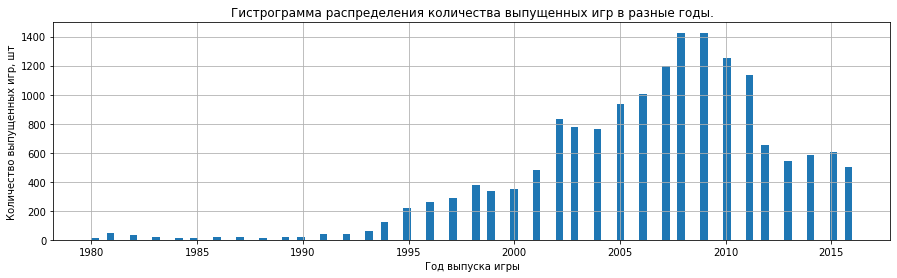

In [22]:
df['year_of_release'].plot(kind='hist', range=(1980, 2016), bins=100, figsize=(15, 4), grid = True)
plt.xlabel('Год выпуска игры')
plt.ylabel('Количество выпущенных игр, шт')
plt.title('Гистрограмма распределения количества выпущенных игр в разные годы.')
plt.show()

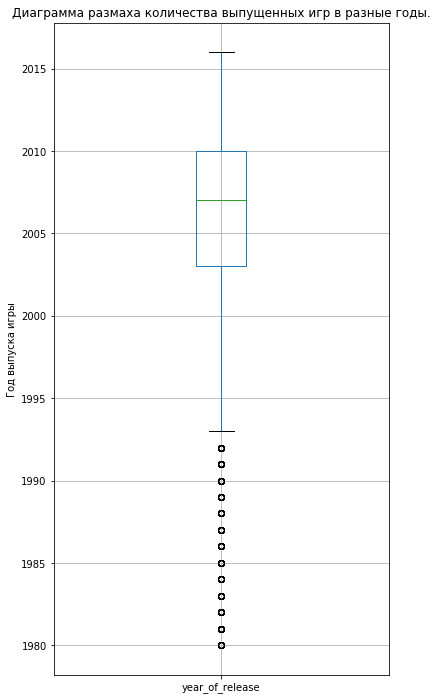

In [23]:
df.boxplot('year_of_release', figsize=(6,12), grid=True)
plt.ylabel('Год выпуска игры')
plt.title('Диаграмма размаха количества выпущенных игр в разные годы.')
plt.show()

Рассчитаем нижнюю и верхнюю границы дат выхода игра, исходя из границ "усов" диаграммы размаха.

In [24]:
#Рассчитаем нижнюю границы дат выхода игра, исходя из границ "усов" диаграммы размаха.
lim_df_year_of_release_min = (df['year_of_release'].quantile(q=0.25) - (df['year_of_release'].quantile(q=0.75) - df['year_of_release'].quantile(q=0.25))*1.5).round()
lim_df_year_of_release_min

1992.0

In [25]:
#Рассчитаем верхнюю границы дат выхода игра, исходя из границ "усов" диаграммы размаха.
lim_df_year_of_release_max = df['year_of_release'].quantile(q=0.75) + (df['year_of_release'].quantile(q=0.75) - df['year_of_release'].quantile(q=0.25))*1.5
if lim_df_year_of_release_max>2016:
    lim_df_year_of_release_max = 2016
else: 
    lim_df_year_of_release_max = lim_df_year_of_release_max.round()
lim_df_year_of_release_max

2016

In [26]:
#внесем изменения датасет по годам выпуска
df_clear = df.query('@lim_df_year_of_release_max >= year_of_release >= @lim_df_year_of_release_min').copy()

In [27]:
#сортировка по возрастанию года выхода игры
df_clear.sort_values(by = 'year_of_release')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
632,Final Fantasy V,SNES,1992.0,Role-Playing,0.00,0.00,2.43,0.02,NaN,NaN,no_rating,2.45
832,NBA Jam,GEN,1992.0,Sports,1.75,0.25,0.00,0.05,NaN,NaN,no_rating,2.05
2612,The 7th Guest,PC,1992.0,Adventure,0.02,0.77,0.00,0.00,NaN,NaN,T,0.79
2129,Romancing SaGa,SNES,1992.0,Role-Playing,0.00,0.00,0.97,0.00,NaN,NaN,no_rating,0.97
2593,Mega Man 5,NES,1992.0,Platform,0.39,0.07,0.32,0.01,NaN,NaN,no_rating,0.79
...,...,...,...,...,...,...,...,...,...,...,...,...
4668,EA Sports UFC 2,XOne,2016.0,Sports,0.24,0.14,0.00,0.04,76.0,6.0,T,0.42
16248,Azure Striker Gunvolt: Striker Pack,3DS,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,T,0.01
13437,Ride 2,PS4,2016.0,Racing,0.00,0.04,0.00,0.01,71.0,8.0,E,0.05
9629,NBA 2K17,PS3,2016.0,Sports,0.06,0.04,0.00,0.02,NaN,2.0,E,0.12


**Вывод подраздела**

1. Исходя из анализа диаграммы размаха для года выпуска игры, ограничиваем диапазон анализируемых дат с 1992 по  
   2016 год.
   
   
2. Падение в индустрии после 2008-2009 г связано с мировым кризисом 2008 года и "перегретостью" рынка.

<a name="life"></a>
### Продажи по разным платформам в разные периоды.

In [28]:
#Сгруппируем данные по платформе и найдем суммарные продажи за весь рассматриваемый (1992-2016) период во всех регионах.
df_platform = df_clear.pivot_table(index='platform', values = 'total_sales', aggfunc='sum').sort_values(by='total_sales', ascending = False).reset_index()
df_platform

,platform,total_sales
0,PS2,1233.56
1,X360,961.24
2,PS3,931.34
3,Wii,891.18
4,DS,802.76
5,PS,727.58
6,PS4,314.14
7,GBA,312.88
8,PSP,289.53
9,3DS,257.81


In [29]:
df_clear.sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
5775,Jampack Volume 12,PS2,2005.0,Misc,0.15,0.12,0.00,0.04,NaN,NaN,no_rating,0.31
12683,Exist Archive: The Other Side of the Sky,PSV,2015.0,Role-Playing,0.01,0.00,0.05,0.00,71.0,8.3,T,0.06
1351,SimCity (2013),PC,2013.0,Simulation,0.48,0.77,0.00,0.17,64.0,2.2,E10+,1.42
9355,Retro Atari Classics,DS,2005.0,Misc,0.12,0.00,0.00,0.01,51.0,3.7,E,0.13
9769,Medarot DS: Kabuto / Kuwagata Ver.,DS,2010.0,Role-Playing,0.00,0.00,0.12,0.00,NaN,NaN,no_rating,0.12


In [30]:
#составим таблицу временеми жизни различных платформ
df_years_life = df_clear.groupby('platform').agg({'total_sales': ['sum'], 'year_of_release': ['min', 'max']}).reset_index() 
df_years_life.columns = ['platform','total_sales_sum', 'year_of_release_min','year_of_release_max']
df_years_life['period_life']=df_years_life['year_of_release_max'] - df_years_life['year_of_release_min']
df_years_life.head()

,platform,total_sales_sum,year_of_release_min,year_of_release_max,period_life
0,3DO,0.10,1994.0,1995.0,1.0
1,3DS,257.81,2011.0,2016.0,5.0
2,DC,15.95,1998.0,2008.0,10.0
3,DS,802.76,2004.0,2013.0,9.0
4,GB,177.57,1992.0,2001.0,9.0


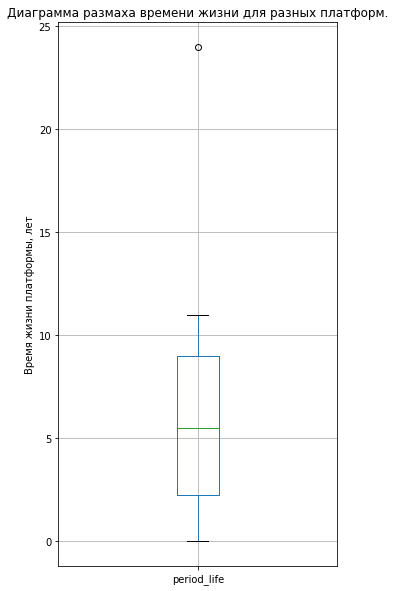

In [31]:
#Диаграмма размаха времени жизни игровых платформ
df_years_life.boxplot('period_life', figsize=(5,10), grid=True)
plt.ylabel('Время жизни платформы, лет')
plt.title('Диаграмма размаха времени жизни для разных платформ.')
plt.show()

Как видно из диаграммы размаха имеется один вброс с очень большим периодом жизни. Его необходимо отбросить и рассчитать среднее значение.

In [32]:
#отсекаем вбросы за пределами усов (более 15 лет)
#Среднее время жизни платформы(кол-во лет) 
df_years_life = df_years_life[df_years_life['period_life'] < 15]
df_years_life['period_life'].mean().round()

6.0

Рассмотрим распределение объемов продаж по платформам и выделим лидеров.

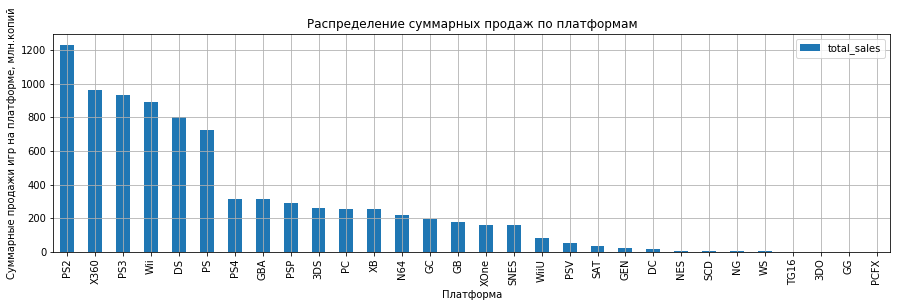

In [33]:
#диаграмма распределения суммарных продаж по платформам
df_platform.plot(kind='bar', x ='platform', y='total_sales', figsize=(15, 4), grid = True)
plt.xlabel('Платформа')
plt.ylabel('Суммарные продажи игр на платформе, млн.копий')
plt.title('Распределение суммарных продаж по платформам')
plt.show()

На графике суммарных продаж по платформам отчетливо видны три группы:
  1. Платформы-лидеры с объемом продаж выше 600 млн. копий: PS2, X360, PS3, Wii, DS, PS.
  2. Платформы-середнички с объемом продаж от 150 до 400 млн. копий: GBA, PS4, PSP, PC, 3DS, XB, GB, NES, N64, SNES, GC, XOne.
  3. Платформы-аутсайдеры с объемом продаж менее 150 млн. копий.

Посмотрим распределение по годам выпуска для платформ-лидеров.

In [34]:
#таблица платформ-лидеров
df_platform_top = df_platform.query('total_sales >= 600')
df_platform_top

,platform,total_sales
0,PS2,1233.56
1,X360,961.24
2,PS3,931.34
3,Wii,891.18
4,DS,802.76
5,PS,727.58


In [35]:
#срез данных для платформ-лидеров продаж
df_platform_top_total = df_clear.query('platform in @df_platform_top.platform')
df_platform_top_total.sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
13870,The Chase: Felix Meets Felicity,DS,2009.0,Action,0.04,0.00,0.0,0.00,59.0,NaN,E,0.04
5649,The Darkness II,PS3,2012.0,Shooter,0.14,0.13,0.0,0.05,79.0,7.6,M,0.32
7932,Jeep Thrills,Wii,2008.0,Racing,0.17,0.00,0.0,0.01,NaN,5.7,E,0.18
8433,Naval Assault: The Killing Tide,X360,2010.0,Simulation,0.08,0.07,0.0,0.02,40.0,4.2,T,0.17
10675,World Series of Poker 2008: Battle for the Bra...,PS3,2007.0,Misc,0.08,0.01,0.0,0.01,75.0,NaN,T,0.10


In [36]:
#составим таблица с временем жизни платформ из ТОП списка
df_years_life_top = df_platform_top_total.groupby('platform').agg({'total_sales': ['sum'], 'year_of_release': ['min', 'max']}).reset_index() 
df_years_life_top.columns = ['platform','total_sales_sum', 'year_of_release_min','year_of_release_max']
df_years_life_top['period_life']=df_years_life_top['year_of_release_max'] - df_years_life_top['year_of_release_min']
df_years_life_top

,platform,total_sales_sum,year_of_release_min,year_of_release_max,period_life
0,DS,802.76,2004.0,2013.0,9.0
1,PS,727.58,1994.0,2003.0,9.0
2,PS2,1233.56,2000.0,2011.0,11.0
3,PS3,931.34,2006.0,2016.0,10.0
4,Wii,891.18,2006.0,2016.0,10.0
5,X360,961.24,2005.0,2016.0,11.0


In [37]:
#Среднее значение цикла жизни для платформ из ТОП списка
df_years_life_top['period_life'].mean()

10.0

In [38]:
#срез данных по платформам-лидерам
df_clear_platform_top = df_clear.query('platform in @df_platform_top.platform')

#проверка
df_clear_platform_top['platform'].value_counts()

PS2     2127
DS      2120
PS3     1306
Wii     1286
X360    1232
PS      1190
Name: platform, dtype: int64

In [39]:
#Сводная таблица продаж платформ-лидеров по годам
df_clear_platform_top_pivot = df_clear_platform_top.pivot_table(index='year_of_release', columns='platform', values = 'total_sales', aggfunc='sum').reset_index()
df_clear_platform_top_pivot

platform,year_of_release,DS,PS,PS2,PS3,Wii,X360
0,1994.0,NaN,6.03,NaN,NaN,NaN,NaN
1,1995.0,NaN,35.96,NaN,NaN,NaN,NaN
2,1996.0,NaN,94.70,NaN,NaN,NaN,NaN
3,1997.0,NaN,136.17,NaN,NaN,NaN,NaN
4,1998.0,NaN,169.49,NaN,NaN,NaN,NaN
5,1999.0,NaN,144.53,NaN,NaN,NaN,NaN
6,2000.0,NaN,96.37,39.17,NaN,NaN,NaN
7,2001.0,NaN,35.59,166.43,NaN,NaN,NaN
8,2002.0,NaN,6.67,205.38,NaN,NaN,NaN
9,2003.0,NaN,2.07,184.31,NaN,NaN,NaN


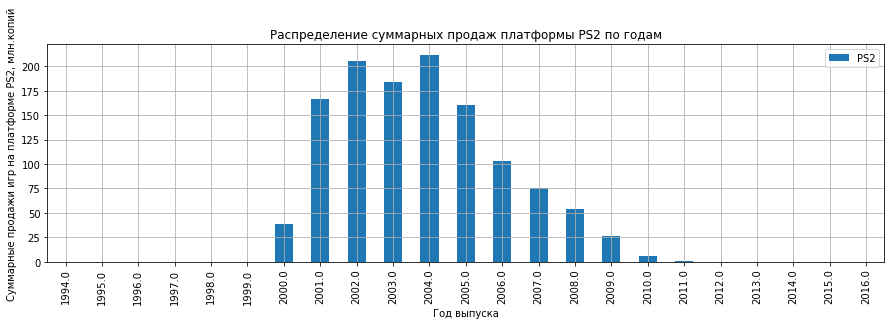

In [40]:
#Столбчатая диаграмма распределения суммарных продаж игр платформ-лидеров по годам выпуска 
df_clear_platform_top_pivot.plot(kind='bar', x ='year_of_release', y='PS2', figsize=(15, 4), grid = True, label='PS2')
plt.xlabel('Год выпуска')
plt.ylabel('Суммарные продажи игр на платформе PS2, млн.копий')
plt.title('Распределение суммарных продаж платформы PS2 по годам')
plt.show()

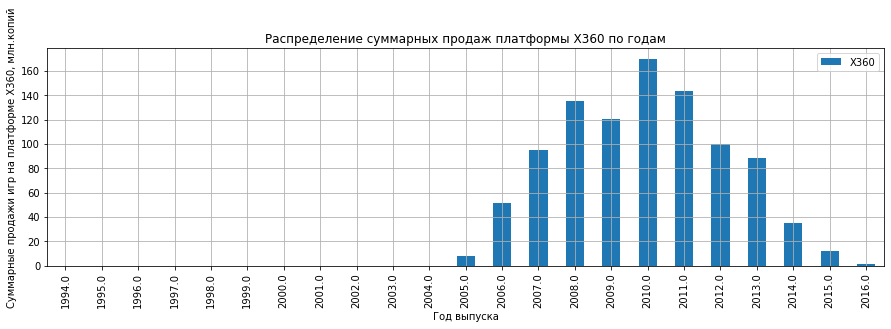

In [41]:
#Столбчатая диаграмма hаспределение суммарных продаж платформы X360 по годам
df_clear_platform_top_pivot.plot(kind='bar', x ='year_of_release', y='X360', figsize=(15, 4), grid = True, label='X360')
plt.xlabel('Год выпуска')
plt.ylabel('Суммарные продажи игр на платформе X360, млн.копий')
plt.title('Распределение суммарных продаж платформы X360 по годам')
plt.show()

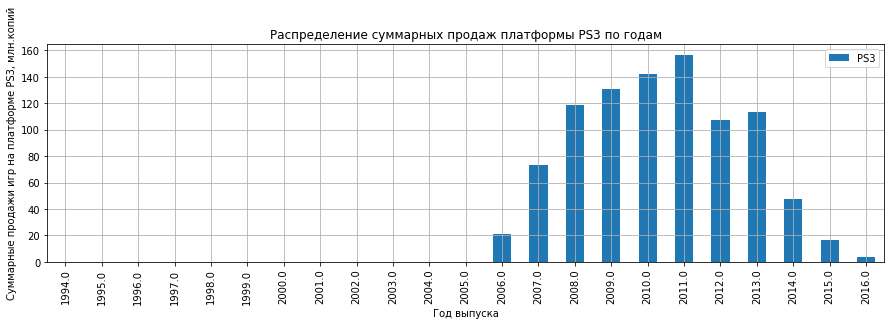

In [42]:
#Столбчатая диаграмма распределение суммарных продаж платформы PS3 по годам
df_clear_platform_top_pivot.plot(kind='bar', x ='year_of_release', y='PS3', figsize=(15, 4), grid = True, label='PS3')
plt.xlabel('Год выпуска')
plt.ylabel('Суммарные продажи игр на платформе PS3, млн.копий')
plt.title('Распределение суммарных продаж платформы PS3 по годам')
plt.show()

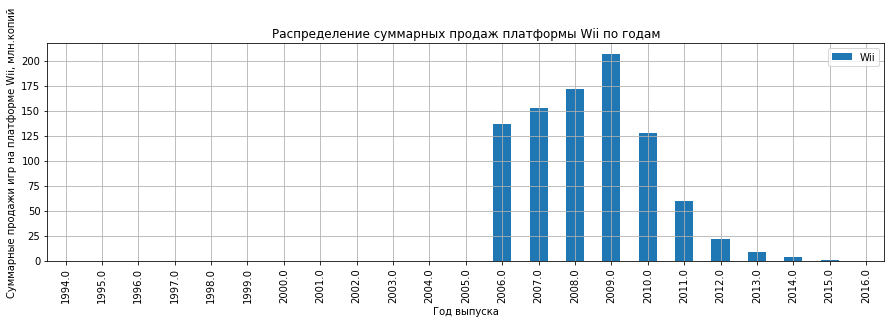

In [43]:
#Столбчатая диаграмма распределение суммарных продаж платформы Wii по годам
df_clear_platform_top_pivot.plot(kind='bar', x ='year_of_release', y='Wii', figsize=(15, 4), grid = True, label='Wii')
plt.xlabel('Год выпуска')
plt.ylabel('Суммарные продажи игр на платформе Wii, млн.копий')
plt.title('Распределение суммарных продаж платформы Wii по годам')
plt.show()

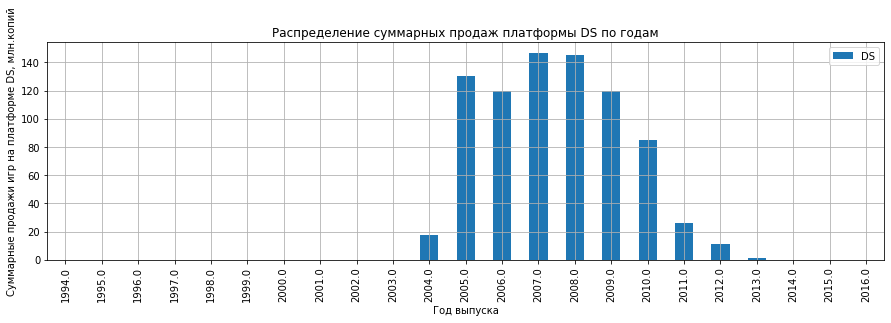

In [44]:
#Столбчатая диаграмма распределение суммарных продаж платформы DS по годам
df_clear_platform_top_pivot.plot(kind='bar', x ='year_of_release', y='DS', figsize=(15, 4), grid = True, label='DS')
plt.xlabel('Год выпуска')
plt.ylabel('Суммарные продажи игр на платформе DS, млн.копий')
plt.title('Распределение суммарных продаж платформы DS по годам')
plt.show()

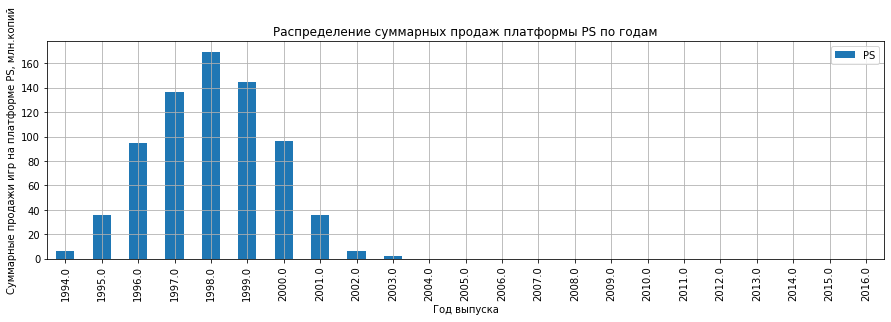

In [45]:
#Столбчатая диаграмма распределение суммарных продаж платформы PS по годам
df_clear_platform_top_pivot.plot(kind='bar', x ='year_of_release', y='PS', figsize=(15, 4), grid = True, label='PS')
plt.xlabel('Год выпуска')
plt.ylabel('Суммарные продажи игр на платформе PS, млн.копий')
plt.title('Распределение суммарных продаж платформы PS по годам')
plt.show()

**Вывод**

1. Все платформы, исходя их объема суммарных продаж, можно разделить на три группы: 
  - лидеры (более 650 млн копий); 
  - среднички (от 150 до 400 млн. копий);
  - аутсайдеры (менее 150 млн. копий).
 

2. Для всех платформ (с 1992 года по 2016 г) построена диаграмма размаха. На ее основании выявлены и отсеяны вбросы. С учетом этого рассчитано среднее время жизни этих платформы. Оно составило 6 лет.
 
  
3. Поскольку в исследование стоит задача выделить несколько потенциально прибыльных платформ, то рассмариваем столбчатый график распределения суммарной прибыли по платформам. На нем четко выделяются платформы-лидеры. Делаем предположение, что для них среднее время жизни может отличаться. 
  
  
4. Исходя из сводной таблицы и гистограмм для платформ-лидеров, имеем следующие сроки жизни платформ: PS2 - 11 лет, X360 -11 лет, PS3 - 10 лет, Wii - 10 лет, DS - 9 лет, PS - 9 лет. Средний срок жизни платформы: 10 лет. Принимаем его как средний, т.к. в дальнейшем буду анализировать именно платформы-лидеры.  

 
5. Цикл жизни платформы обычно состоит из роста продаж (плавного или резкого), достижения максимума, а затем снижения продаж. Максимум, как правило, приходится на средний период (с 4-го по 6-й годы) жизни платформы. Ширина плато на пике имеет различную продолжительность в зависимости от платформы. 

<a name="period"></a>
### Определение актуального периода.

In [46]:
#Таблица с данныи игр, имеющими год выхода 2009 или позже.
df_2009 = df[df['year_of_release'] >=2009]

#проверка
df_2009.sort_values(by='year_of_release')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
5043,Naruto Shippuden: Ultimate Ninja Heroes 3,PSP,2009.0,Fighting,0.13,0.04,0.19,0.03,61.0,6.6,T,0.39
5042,Need for Speed: Nitro,DS,2009.0,Racing,0.21,0.13,0.00,0.04,70.0,6.3,E10+,0.38
5037,Virtua Tennis 2009,PS3,2009.0,Sports,0.09,0.22,0.00,0.06,70.0,6.3,E,0.37
5030,Ice Age: Dawn of the Dinosaurs,DS,2009.0,Action,0.20,0.15,0.00,0.04,54.0,NaN,E,0.39
...,...,...,...,...,...,...,...,...,...,...,...,...
10029,Persona 5,PS3,2016.0,Role-Playing,0.00,0.00,0.11,0.00,NaN,NaN,no_rating,0.11
10026,Disney Art Academy,3DS,2016.0,Action,0.02,0.01,0.08,0.00,72.0,6.8,E,0.11
14836,Dead Rising 2,PS4,2016.0,Action,0.01,0.00,0.01,0.00,82.0,6.6,M,0.02
14759,Bus Simulator 16,PC,2016.0,Simulation,0.00,0.03,0.00,0.00,46.0,6.1,no_rating,0.03


In [47]:
#продажи в 2016 г - получаем данные по актуальным на 2016 год платформам
df_actual_platform = df_2009[(df_2009['year_of_release'] == 2016) & (df_2009['total_sales'] >0)]

#срез данных из таблицы по актуальным на 2016 год платформам с выпуском игры не ранее 2009 года
df_actual_platform_2016 = df_2009.query('platform in @df_actual_platform.platform')
df_actual_platform_2016

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
14,Kinect Adventures!,X360,2010.0,Misc,15.00,4.89,0.24,1.69,61.0,6.3,E,21.82
15,Wii Fit Plus,Wii,2009.0,Sports,9.01,8.49,2.53,1.77,80.0,7.4,E,21.80
16,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
...,...,...,...,...,...,...,...,...,...,...,...,...
16705,15 Days,PC,2009.0,Adventure,0.00,0.01,0.00,0.00,63.0,5.8,no_rating,0.01
16707,Aiyoku no Eustia,PSV,2014.0,Misc,0.00,0.00,0.01,0.00,NaN,NaN,no_rating,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,no_rating,0.01
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,no_rating,0.01


**Вывод**
 
1. В данном разделе мы определяем актуальный период для оценки текущей ситуации на рынке игровых платформ.
  
 
2. Выделим критерии актуального периода: 
   - Возможность построить прогноз на 2017 год. Значит цикл жизни платформы должен быть завершен не ранее 2018   
   года. 
   - Наличие продаж в 2016 году.
   

3. Если исходить из среднего значения для платформ-лидеров(10 лет) и учитывать среднее отклонение в 1 год, то необходимо рассматривать игры имеющие год выпуска не ранее 2009 года.

<a name="platform"></a>
### Выбор потенциально прибыльных платформ.
Рассмотрим ситуацию в актуальный период: какие платформы растут, падают, лидируют по продажам.

In [48]:
#Суммарные продажи в период с 2009 по 2016 год для актуальных платформ
df_2016_pivot = df_actual_platform_2016.pivot_table(index='platform', values = 'total_sales', aggfunc='sum').sort_values(by='total_sales', ascending = False).reset_index()
df_2016_pivot

,platform,total_sales
0,PS3,718.67
1,X360,670.70
2,Wii,429.94
3,PS4,314.14
4,3DS,257.81
5,XOne,159.32
6,PC,138.87
7,WiiU,82.19
8,PSV,53.81


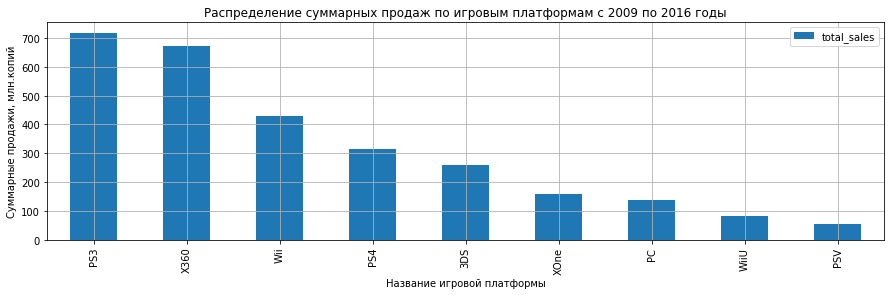

In [49]:
df_2016_pivot.plot(kind='bar',x ='platform', y='total_sales', figsize=(15, 4), grid = True)
plt.xlabel('Название игровой платформы')
plt.ylabel('Суммарные продажи, млн.копий')
plt.title('Распределение суммарных продаж по игровым платформам с 2009 по 2016 годы')
plt.show()

In [50]:
#Сводная таблица распределения продаж по годам в актуальном периоде
df_2016_platform_pivot = df_actual_platform_2016.pivot_table(index='year_of_release', columns='platform', values = 'total_sales', aggfunc='sum').reset_index()
df_2016_platform_pivot

platform,year_of_release,3DS,PC,PS3,PS4,PSV,Wii,WiiU,X360,XOne
0,2009.0,NaN,16.91,130.93,NaN,NaN,206.97,NaN,120.29,NaN
1,2010.0,NaN,24.28,142.17,NaN,NaN,127.95,NaN,170.03,NaN
2,2011.0,63.20,35.03,156.78,NaN,4.63,59.65,NaN,143.84,NaN
3,2012.0,51.36,23.22,107.36,NaN,16.19,21.71,17.56,99.74,NaN
4,2013.0,56.57,12.38,113.25,25.99,10.59,8.59,21.65,88.58,18.96
5,2014.0,43.76,13.28,47.76,100.00,11.90,3.75,22.03,34.74,54.07
6,2015.0,27.78,8.52,16.82,118.90,6.25,1.14,16.35,11.96,60.14
7,2016.0,15.14,5.25,3.60,69.25,4.25,0.18,4.60,1.52,26.15


In [51]:
#Функция для постороения столбчатого графика продаж платформы по годам
def plot_bar_2016(platform):
    df_2016_platform_pivot.plot(kind='bar', x ='year_of_release', y= platform, figsize=(15, 4), grid = True, label=platform)
    plt.xlabel('Год выпуска')
    plt.ylabel('Суммарные продажи игр на платформе, млн.копий')
    plt.title('Распределение суммарных продаж платформы по годам')
    plt.show()

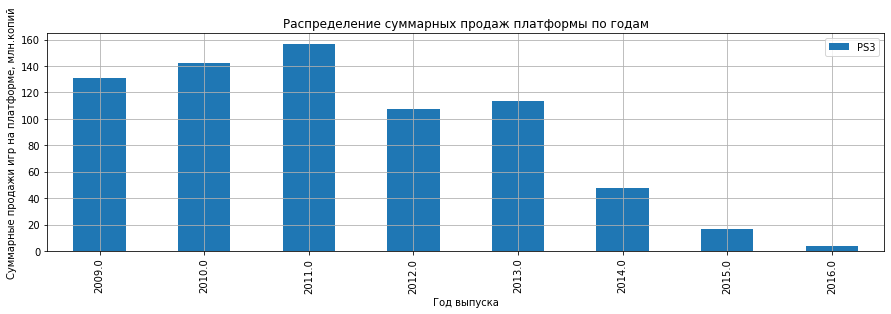

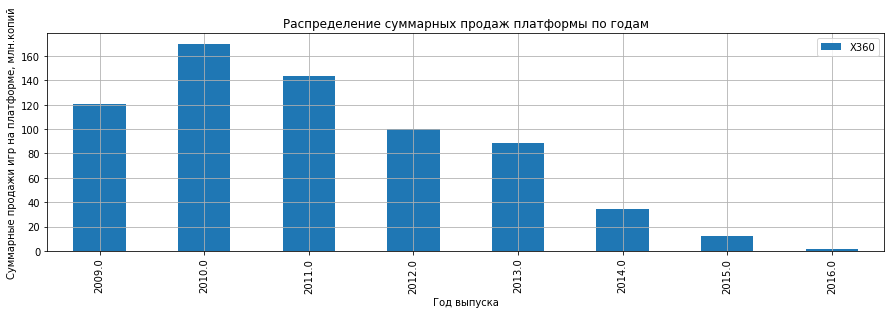

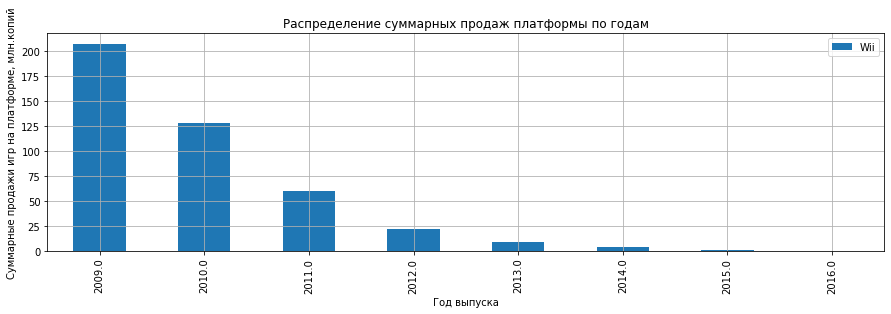

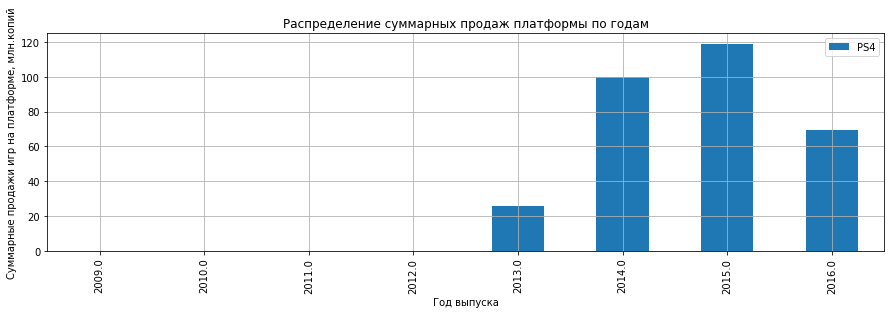

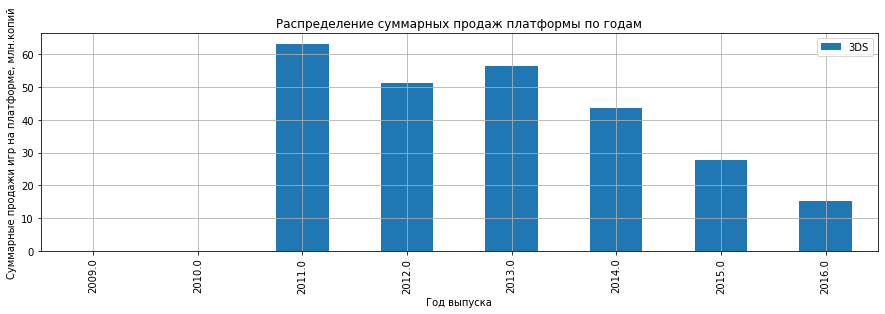

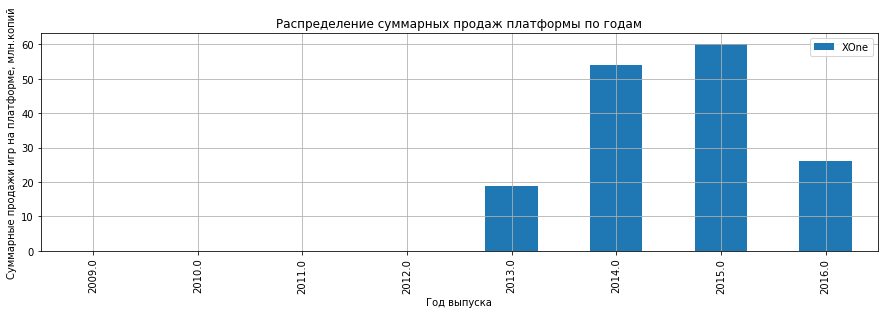

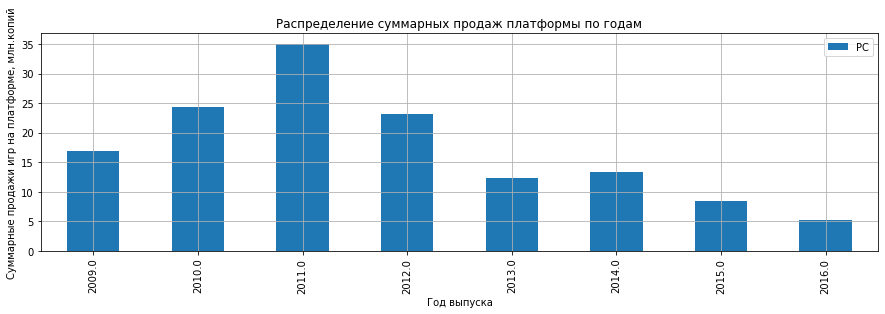

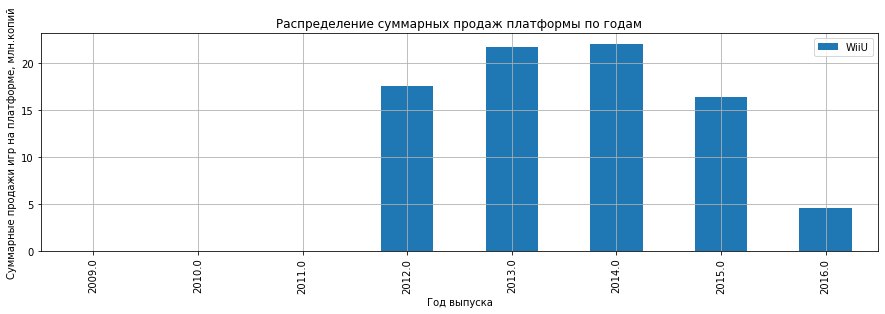

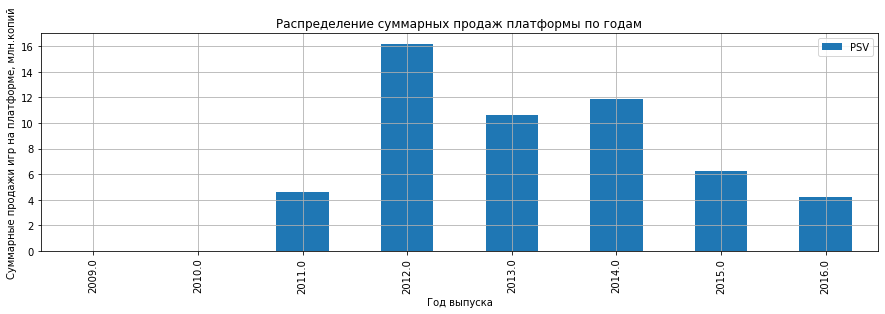

In [52]:
# перебираем платформы в цикле
for i in df_2016_pivot['platform']:
    plot_bar_2016(i)

 **Вывод**

Исходя из выбранных условий актуальности (производство не ранее 2009 года и наличие продаж у платформы в 2016 году) мы предварительно отобрали 9 платформ (PS3, X360, Wii, PS4, 3DS, XOne, PC, WiiU, PSV).

 

*Посмотрев диаграммы изменения продаж по годам и даты выхода платформ мы исключаем:*
  1. PS3 - цикл жизни почти завершен (2017 год - 9-й по счету, динамика падения продаж до минимума);
  2. X360 - цикл жизни почти завершен (2017 год - 9-й по счету, динамика падения продаж до минимума);
  3. Wii - цикл жизни почти завершен (2017 год - 9-й по счету, динамика падения продаж до минимума);
  4. PC - цикл жизни почти завершен (2017 год - 9-й по счету, динамика падения продаж до минимума);
  5. WiiU - посередине жизненного цикла, но продажи имеют небольшие объем, при этом на лицо динамика сильного падения характерная для конца жизненного цикла (возможно у этой платформы он короче);
  6. PSV - вторая половина жизненного цикла, но продажи имеют небольшие объем и при этом на лицо динамика сильного падения характерная для конца жизненного цикла (возможно у этой платформы он короче).


*Выбрали потенциально прибыльные платформы*
  1. PS4 - середина жизненного цикла (2017 год - 5-й по счету), есть динамика к снижению, но имеет самые большие объемы продаж; является следующим поколением после PS3, что позволяет ожидать высокие продажи в течении 4 лет.
  2. 3DS - находится во второй части жизненного цикла (2017 год - 7-й по счету), можно ожидать актуальность в ближайщие 2 года,  не смотря на падение продаж, характерное для этого периода.
  3. XOne - находится по середине жизненного цикла (2017 год - 5-й по счету), есть динамика к снижению, но имеет следующие по объему продажи после PS4.

<a name="spread"></a>
### Диаграмма разброса глобальных продаж игр в разбивке по платформам.

In [53]:
#сформируем таблица для потенциально прибыльных платформ
df_platform_profitable = df[(df['platform'] == 'PS4')|(df['platform'] == '3DS')|(df['platform'] == 'XOne')]

#проверка
df_platform_profitable.sample(5)                  

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
5320,Mirror's Edge Catalyst,PS4,2016.0,Platform,0.11,0.16,0.02,0.05,69.0,4.7,T,0.34
13752,Riding Stables: The Whitakers present Milton a...,3DS,2011.0,Sports,0.00,0.04,0.00,0.00,NaN,NaN,no_rating,0.04
10079,Super Run For Money Tousouchuu Atsumare! Saiky...,3DS,2015.0,Action,0.00,0.00,0.11,0.00,NaN,NaN,no_rating,0.11
14899,The Peanuts Movie: Snoopy's Grand Adventure,PS4,2015.0,Action,0.00,0.02,0.00,0.00,59.0,6.6,E,0.02
2232,Lego Batman 3: Beyond Gotham,PS4,2014.0,Action,0.37,0.40,0.00,0.15,73.0,7.1,E10+,0.92


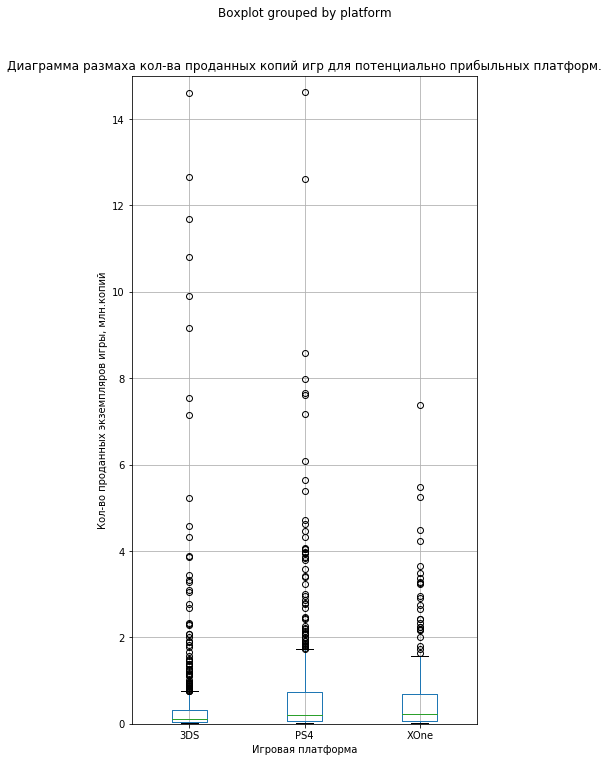

In [54]:
df_platform_profitable.boxplot('total_sales',  by='platform', figsize=(6,12), grid=True)
plt.ylim(0, 15)
plt.ylabel('Кол-во проданных экземпляров игры, млн.копий')
plt.xlabel('Игровая платформа')
plt.title('Диаграмма размаха кол-ва проданных копий игр для потенциально прибыльных платформ.')
plt.show()

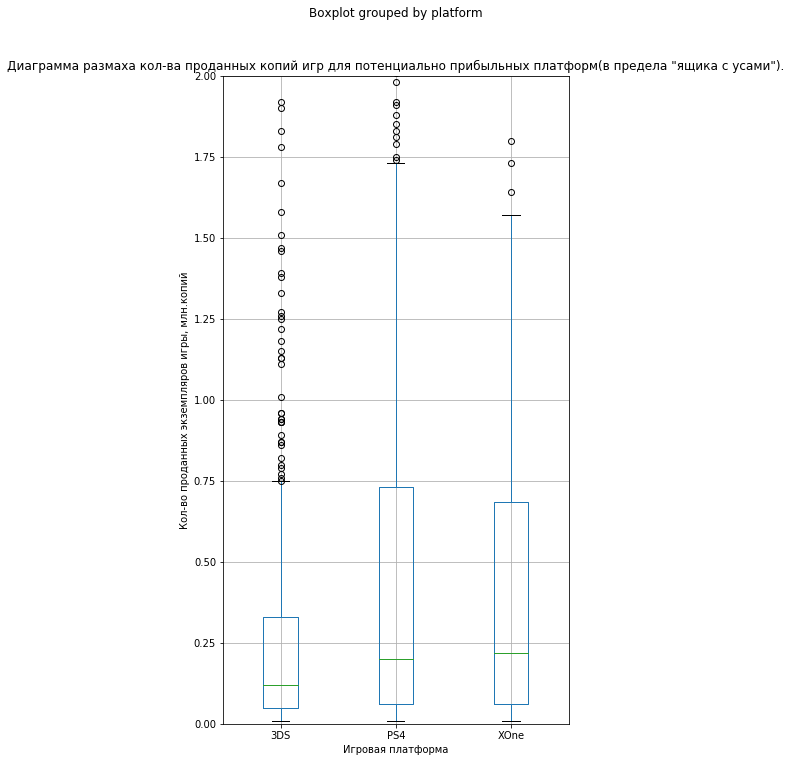

In [55]:
#Еще раз выведем диаграммы размаха с увеличением в интервале межквартильного размаха
df_platform_profitable.boxplot('total_sales',  by='platform', figsize=(6,12), grid=True)
plt.ylim(0, 2)
plt.ylabel('Кол-во проданных экземпляров игры, млн.копий')
plt.xlabel('Игровая платформа')
plt.title('Диаграмма размаха кол-ва проданных копий игр для потенциально прибыльных платформ(в предела "ящика с усами").')
plt.show()

**Вывод**
 
 
1. Платформы PS4 и XOne имеют близкие значения медианы (около 0.2) и размеры межквартильных размахов   
   (приблизительно: 0.1 - 0.7). Каждая из них имеет большие "вбросы" выходящие за пределы усов - это игры лидеры-    продаж. Их небольшое количество, но их продажи на порядок превышают значения свойственные большинству игр       
   данных платформ. Эти игры очень важны с коммерческой точки зрения.

 
2. Платформа 3DS отличается по расположению "ящика" на оси продаж. Нижняя граница почти совпадает с PS4 и 
   XOne(чуть меньше 0.1), в то время как верхняя - значительно ниже (около 0.35). Значение медианы также меньше  
   (около 0.15).  При это 3DS имеет большее количество "вбросов" (значений за верхним пределом "усов"). Некоторые    значения сопоставимы с хитами от PS4 и обходят платформу XOne. С коммерческой точки зрения, эти "вбросы" 
   являются очень интересным сегментом, т.к. имеют продажи на порядок превышающие большинство значений. Поскольку 
   их относительно немного и они должны быть достаточно известны, то основной рекламный бюджет можно сосредоточить 
   на них. А меньшую его часть оставить для рекламы игр, входящих в пределы "ящика".

 
3. Разница между платформами обусловлена регионом:
    - 3DS - в основном Япония с их менталитетом;
    - PS4 и XOne - глобальные игроки, но большой процент продаж на EU и NA.

<a name="reviews_one"></a>
### Влияние отзывов пользователей и критиков на примере одной платформы.

Для изучения возьмем платформу PS4 - как одну из самых успешных, с точки зрения объема глобальных продаж за 2016 год.


In [56]:
#отфильтруем данные по платформе PS4
df_PS4 = df[df['platform']=='PS4']
df_PS4.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,no_rating,14.63
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
77,FIFA 16,PS4,2015.0,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015.0,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,no_rating,7.98
92,Call of Duty: Advanced Warfare,PS4,2014.0,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66


In [57]:
#отфильтруем таблица по нужным параметрам critic_score и user_score
df_PS4_score = df_PS4[['name','critic_score','user_score','total_sales']]
df_PS4_score.head()

,name,critic_score,user_score,total_sales
31,Call of Duty: Black Ops 3,NaN,NaN,14.63
42,Grand Theft Auto V,97.0,8.3,12.62
77,FIFA 16,82.0,4.3,8.58
87,Star Wars Battlefront (2015),NaN,NaN,7.98
92,Call of Duty: Advanced Warfare,83.0,5.7,7.66


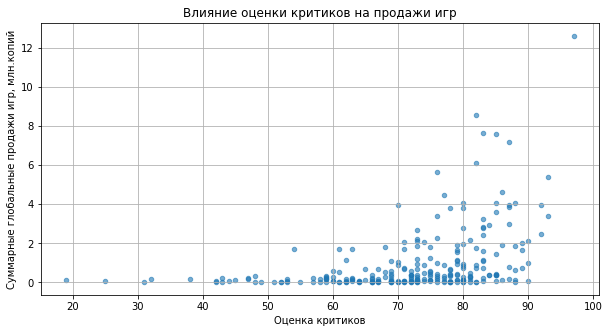

In [58]:
#Построение диаграммы рассеяния для оценки критиков
df_PS4_score.plot(x='critic_score', y='total_sales',  alpha=0.6, kind='scatter', grid= True, figsize=(10,5));
plt.xlabel('Оценка критиков')
plt.ylabel('Суммарные глобальные продажи игр, млн.копий')
plt.title('Влияние оценки критиков на продажи игр')
plt.show()

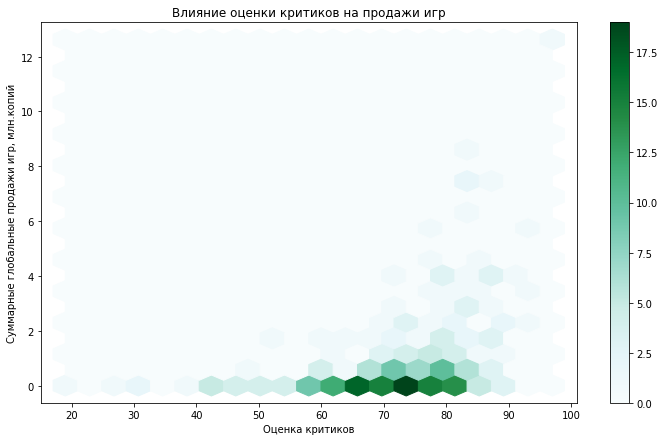

In [59]:
# Влияние оценки критиков на продажи игр
df_PS4_score.plot(x='critic_score', y='total_sales', kind='hexbin', gridsize=20, sharex=False, figsize=(12,7));
plt.xlabel('Оценка критиков')
plt.ylabel('Суммарные глобальные продажи игр, млн.копий')
plt.title('Влияние оценки критиков на продажи игр')
plt.show()

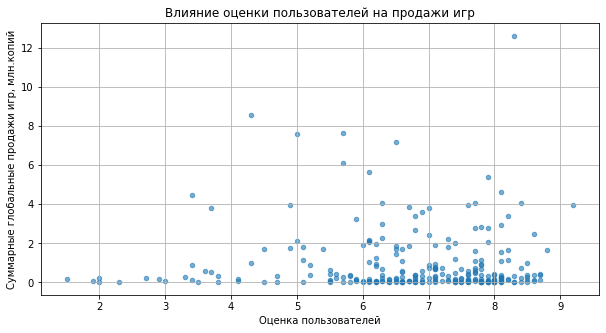

In [60]:
#Построение диаграммы рассеяния для оценки пользователей
df_PS4_score.plot(x='user_score', y='total_sales',  alpha=0.6, kind='scatter', grid= True, figsize=(10,5));
plt.xlabel('Оценка пользователей')
plt.ylabel('Суммарные глобальные продажи игр, млн.копий')
plt.title('Влияние оценки пользователей на продажи игр')
plt.show()

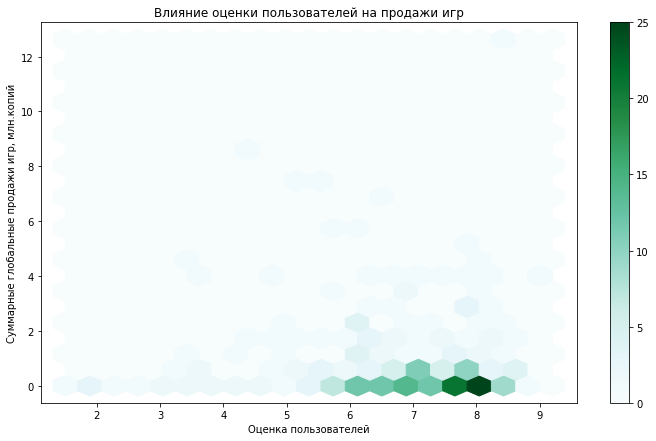

In [61]:
#Построение ячеистой диаграммы рассеяния для оценки пользователей
df_PS4_score.plot(x='user_score', y='total_sales', kind='hexbin', gridsize=20, sharex=False, figsize=(12,7));
plt.xlabel('Оценка пользователей')
plt.ylabel('Суммарные глобальные продажи игр, млн.копий')
plt.title('Влияние оценки пользователей на продажи игр')
plt.show()

In [62]:
#матрица корреляции
display (df_PS4_score.corr()['total_sales']
 .to_frame()
 .sort_values('total_sales', ascending=False)
 .style
 .background_gradient(cmap="Greens")     
)

,total_sales
total_sales,1
critic_score,0.406568
user_score,-0.0319571


**Вывод**

Мы рассчитали коэффициенты корреляции Пирсона и вывели диаграммы рассеяния для игр на платформе PS4, чтобы оценить их зависимость от оценки критиков и оценки пользователей. В результате пришли к следующим выводам:
 
- на основании диаграммы рассеяния и матрицы корреляции делаем вывод о том, что зависимость между суммарными продажами игр и оценкой критиков слабая положительная (также возможно влияние третьей величины и нелинейная связь);
  
- зависимость между оценкой пользователей и суммарными продажи отсутствует (либо является нелинейной/подвержена влиянию третьих величин).

<a name="reviews_another"></a>
### Влияние отзывов на других платформах.

Проанализируем влияние оценки критиков и пользователей на платформы 3DS и XOne.

#### Влияние оценок критиков и пользователей на продажи игр для платформы 3DS

In [63]:
#отфильтруем данные по платформе 3DS
df_3DS = df[df['platform']=='3DS']

In [64]:
#отфильтруем данные по нужным параметрам: critic_score и user_score для платформы 3DS
df_3DS_score = df_3DS[['name','critic_score','user_score','total_sales']]
df_3DS_score.sample(5)

,name,critic_score,user_score,total_sales
16248,Azure Striker Gunvolt: Striker Pack,NaN,NaN,0.01
11436,Adventure Time: The Secret of the Nameless Kin...,65.0,5.6,0.07
16688,Outdoors Unleashed: Africa 3D,NaN,NaN,0.01
12631,Metal Max 4: Gekkou no Diva,NaN,NaN,0.06
11892,Petz Fantasy 3D,NaN,NaN,0.07


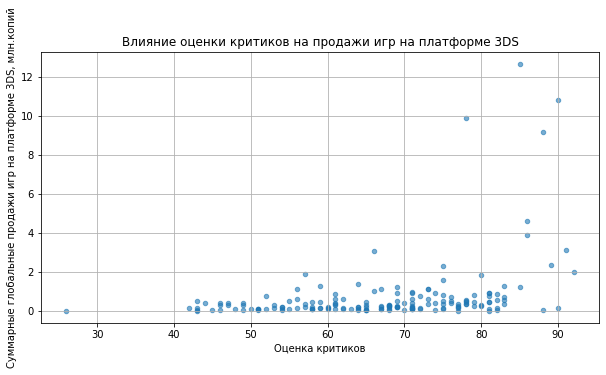

In [65]:
#Построим диаграмму рассеяния для влияния оценки критиков на платформе 3DS
df_3DS_score.plot(x='critic_score', y='total_sales',  alpha=0.6, kind='scatter', grid= True, figsize=(10,5));
plt.xlabel('Оценка критиков')
plt.ylabel('Суммарные глобальные продажи игр на платформе 3DS, млн.копий')
plt.title('Влияние оценки критиков на продажи игр на платформе 3DS')
plt.show()

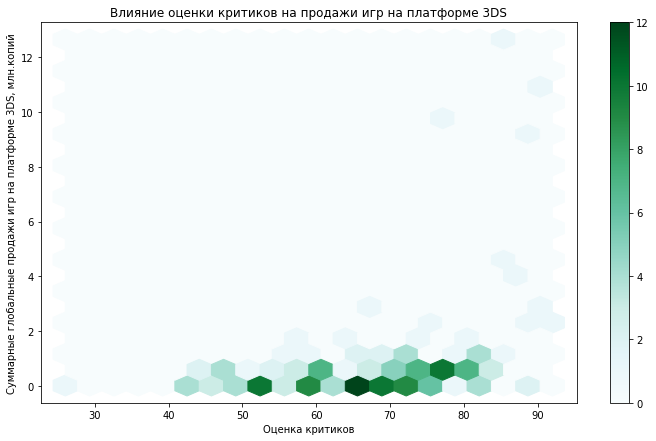

In [66]:
#Построим сотовую диаграмму рассеяния для влияния оценки критиков на платформе 3DS
df_3DS_score.plot(x='critic_score', y='total_sales', kind='hexbin', gridsize=20, sharex=False, figsize=(12,7));
plt.xlabel('Оценка критиков')
plt.ylabel('Суммарные глобальные продажи игр на платформе 3DS, млн.копий')
plt.title('Влияние оценки критиков на продажи игр на платформе 3DS')
plt.show()

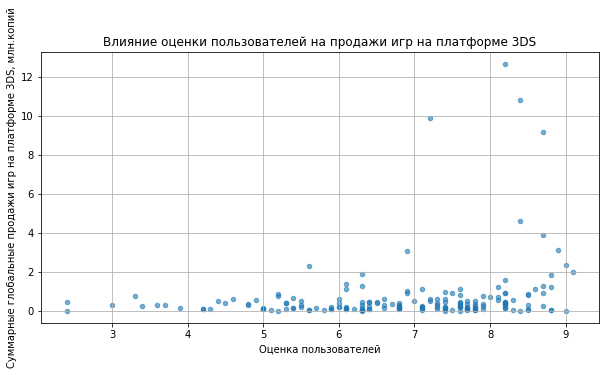

In [67]:
#Построим диаграмму рассеяния для влияния оценки пользователей на платформе 3DS
df_3DS_score.plot(x='user_score', y='total_sales',  alpha=0.6, kind='scatter', grid= True, figsize=(10,5));
plt.xlabel('Оценка пользователей')
plt.ylabel('Суммарные глобальные продажи игр на платформе 3DS, млн.копий')
plt.title('Влияние оценки пользователей на продажи игр на платформе 3DS')
plt.show()

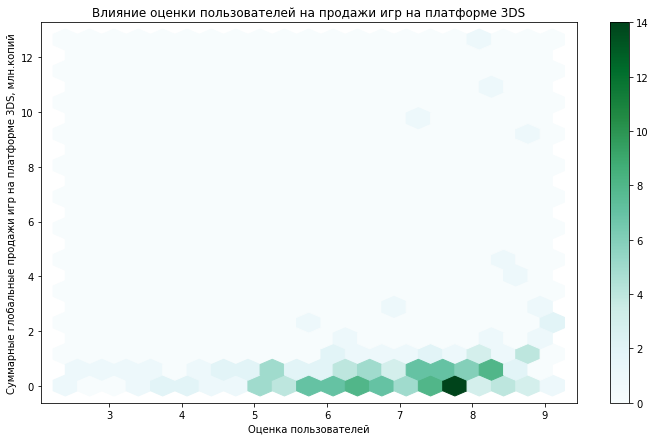

In [68]:
#Построим диаграмму рассеяния для влияния оценки пользователей на платформе 3DS
df_3DS_score.plot(x='user_score', y='total_sales', kind='hexbin', gridsize=20, sharex=False, figsize=(12,7));
plt.xlabel('Оценка пользователей')
plt.ylabel('Суммарные глобальные продажи игр на платформе 3DS, млн.копий')
plt.title('Влияние оценки пользователей на продажи игр на платформе 3DS')
plt.show()

In [69]:
#матрица корреляции на платформе 3DS
display (df_3DS_score.corr()['total_sales']
 .to_frame()
 .sort_values('total_sales', ascending=False)
 .style
 .background_gradient(cmap="Greens")     
)

,total_sales
total_sales,1
critic_score,0.349401
user_score,0.224808


#### Влияние оценок критиков и пользователей на продажи игр для платформы XOne

In [70]:
#отфильтруем данные по платформе XOne
df_XOne = df[df['platform']=='XOne']

In [71]:
#отфильтруем данные по нужным параметрам: critic_score и user_score для платформы XOne
df_XOne_score = df_XOne[['name','critic_score','user_score','total_sales']]
df_XOne_score.sample(5)

,name,critic_score,user_score,total_sales
9852,Tony Hawk's Pro Skater 5,39.0,2.1,0.12
165,Grand Theft Auto V,97.0,7.9,5.47
4198,EA Sports UFC,70.0,6.3,0.46
9374,Life is Strange,85.0,8.7,0.13
709,Battlefield 1,87.0,8.2,2.25


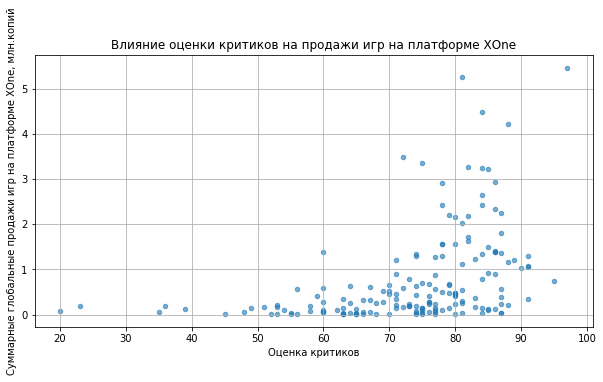

In [72]:
#Построим диаграмму рассеяния для влияния оценки критиков на платформе XOne
df_XOne_score.plot(x='critic_score', y='total_sales',  alpha=0.6, kind='scatter', grid= True, figsize=(10,5));
plt.xlabel('Оценка критиков')
plt.ylabel('Суммарные глобальные продажи игр на платформе XOne, млн.копий')
plt.title('Влияние оценки критиков на продажи игр на платформе XOne')
plt.show()

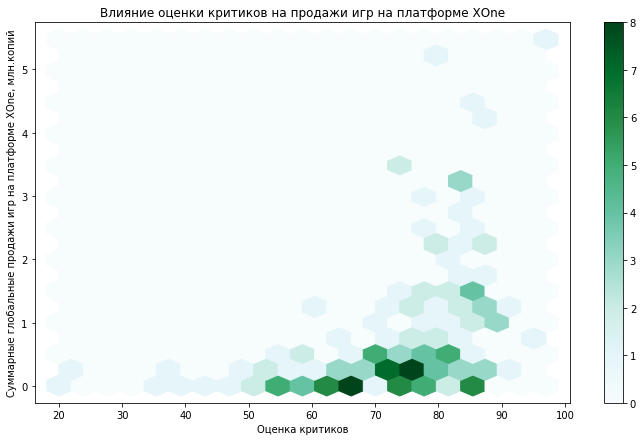

In [73]:
#Построим диаграмму рассеяния для влияния оценки критиков на платформе XOne
df_XOne_score.plot(x='critic_score', y='total_sales', kind='hexbin', gridsize=20, sharex=False, figsize=(12,7));
plt.xlabel('Оценка критиков')
plt.ylabel('Суммарные глобальные продажи игр на платформе XOne, млн.копий')
plt.title('Влияние оценки критиков на продажи игр на платформе XOne')
plt.show()

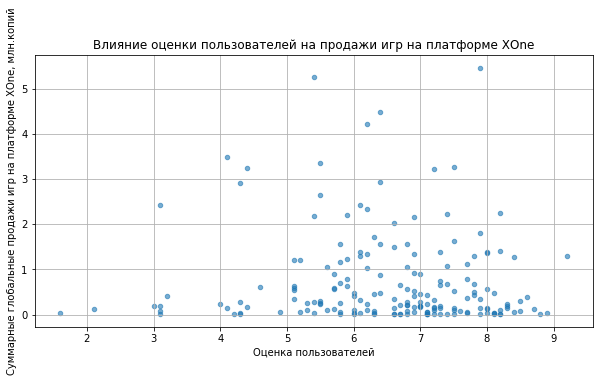

In [74]:
#Построим диаграмму рассеяния для влияния оценки пользователей на платформе XOne
df_XOne_score.plot(x='user_score', y='total_sales',  alpha=0.6, kind='scatter', grid= True, figsize=(10,5));
plt.xlabel('Оценка пользователей')
plt.ylabel('Суммарные глобальные продажи игр на платформе XOne, млн.копий')
plt.title('Влияние оценки пользователей на продажи игр на платформе XOne')
plt.show()

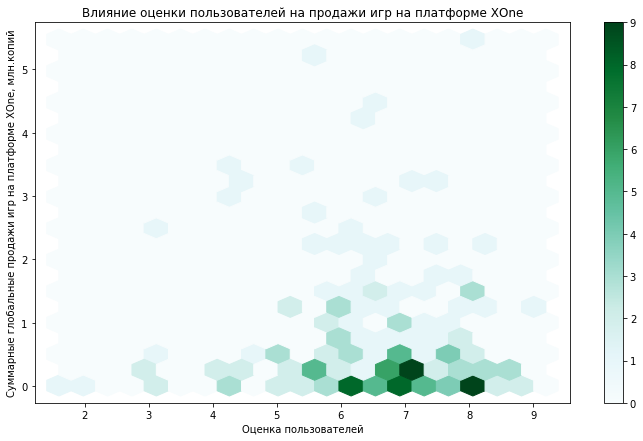

In [75]:
#Построим диаграмму рассеяния для влияния оценки пользователей на платформе XOne
df_XOne_score.plot(x='user_score', y='total_sales', kind='hexbin', gridsize=20, sharex=False, figsize=(12,7));
plt.xlabel('Оценка пользователей')
plt.ylabel('Суммарные глобальные продажи игр на платформе XOne, млн.копий')
plt.title('Влияние оценки пользователей на продажи игр на платформе XOne')
plt.show()

In [76]:
#матрица корреляции на платформе XOne
display (df_XOne_score.corr()['total_sales']
 .to_frame()
 .sort_values('total_sales', ascending=False)
 .style
 .background_gradient(cmap="Greens")     
)

,total_sales
total_sales,1
critic_score,0.416998
user_score,-0.0689251


**Вывод**

1. Влиение оценки критиков и пользователей на продажи игр на платформе 3DS: 
  - существует слабовыраженная положительная зависимость между продажами и оценками критиков;
  - зависимость продаж от оценки пользователей положительная, но очень слабая;
  - существует возможность того, что на данные зависимости влияют третьи величины и они не являются линейными.
  
   
  
2. Влиение оценки критиков и пользователей на продажи игр на платформе XOne: 
  - существует слабовыраженная положительная зависимость между продажами и оценками критиков;
  - зависимость продаж от оценки пользователей отсутствует;
  - существует возможность того, что на данные зависимости влияют третьи величины и они не являются линейными.
   
  
3. Сравнение влияния оценок критиков и пользователей на продажи игр на трех потенциально прибыльных платформах:
  - у всех трех платформ наблюдается слабовыраженная положительная зависимость продаж от оценки критиков;
  - влияние оценки пользователей либо отсутствует (для платформ PS4 и XOne), либо имеет очень слабый положительный характер (для платформы 3DS).
   
   
  
4. Вообще можно сказать, что платформы PS4 и XOne имеют очень похожие характеристики по влиянию оценок на продажи и диаграммы разброса по продажам. В то время, как платформа 3DS стоит особняком, показываю другой характер диаграммы разброса и зависимостей продаж от оценок пользователей.


5. Возможные причины различного влияния рейтингов.
    - Пользовательские рейтинги больше отражают ожидания пользователей - разочаровали их или нет. Это 
      эмоциональная составляющая. 
    - Рейтинг критиков может быть более конструктивный. Однако на него скорее всего влияют различные маркетинговые 
      мероприятия, которые используют производители для повышения спроса.

<a name="genres"></a>
### Распределение игр по жанрам.

Для оценки влияния жанра на продажи возьмем выборку для потенциально прибыльных платформ: PS4, XOne, 3DS.

In [77]:
df_platform_profitable.sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
13501,Sébastien Loeb Rally Evo,PS4,2016.0,Racing,0.00,0.04,0.00,0.01,71.0,8.1,E,0.05
13413,XCOM 2,XOne,2016.0,Strategy,0.02,0.02,0.00,0.00,87.0,8.1,T,0.04
13597,Nobunaga's Ambition: Sphere of Influence,PS4,2014.0,Strategy,0.03,0.00,0.00,0.01,80.0,8.1,T,0.04
14221,Langrisser: Re:Incarnation Tensei,3DS,2015.0,Role-Playing,0.02,0.00,0.01,0.00,NaN,NaN,no_rating,0.03
16143,Azure Striker Gunvolt,3DS,2016.0,Action,0.01,0.00,0.00,0.00,77.0,8.4,E10+,0.01


In [78]:
#сгруппируем игры по жанрам и сделаем сортировку по суммарным продажам
df_platform_profitable_group=df_platform_profitable.groupby('genre').agg({'total_sales': ['count', 'sum']}).reset_index()
df_platform_profitable_group.columns = ['genre', 'total_sales_count', 'total_sales_sum']
df_platform_profitable_group.sort_values(by = 'total_sales_sum', ascending = False)

,genre,total_sales_count,total_sales_sum
0,Action,417,191.65
8,Shooter,86,150.18
7,Role-Playing,153,123.77
10,Sports,110,88.52
4,Platform,45,41.15
6,Racing,50,36.89
9,Simulation,41,29.37
3,Misc,93,26.61
2,Fighting,39,21.66
1,Adventure,80,13.94


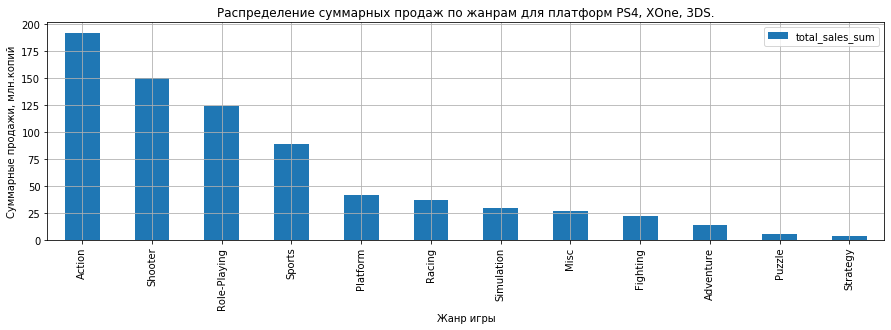

In [79]:
#столбчатый график распределения прибыли по жанрам
df_platform_profitable_group.sort_values(by = 'total_sales_sum', ascending = False).plot(kind='bar',x ='genre', y='total_sales_sum', figsize=(15, 4), grid = True)

plt.xlabel('Жанр игры')

plt.ylabel('Суммарные продажи, млн.копий')

plt.title('Распределение суммарных продаж по жанрам для платформ PS4, XOne, 3DS.')

plt.show()

**Вывод**

1. На столбчатом графике распределения продаж по различным жанрам выделются три области:
  - жанры-лидеры (с объемом продаж более 50 млн. копий);
  - жанры-среднички (с объемом продаж от 20 до 50 млн. копий);
  - жанры-аутсайдеры (с объемом продаж менее 20 млн. копий).
 
  
2. Жанры-лидеры имеют отличительная особенность - активные действия, постороенные на рефлекторных реакциях:
  - Action;
  - Shooter;
  - Role-playing;
  - Sports.
  
   
3. Жанры-среднички:
  - Platform;
  - Racing;
  - Simulation;
  - Misc;
  - Fighting;
  - Adventure.
 
 
4. Жанры-аутсайдеры имеют отличительная особенность - размышление, абстрактное мышление:
  - Puzzle;
  - Strategy.


**Выводы по разделу "Исследовательский анализ данных"**


1. Ограничили диапазон предварительно анализируемых дат с 1992 по 2016 год. Это обусловленно небольшим рынком продаж ранее 1992 года, что в свою очередь, было вызвано незрелостью технологий на тот период.
  

2. Рассчитали время характерного цикла жизни игровых платформ - 10 лет и определили его характер: сначала рост, затем пик и падение. На этапе падения появляется новая платформа, которая проходит в это время период роста.
  

3. Выделили критерии актуального для рассмотрения периода: возможность построить прогноз на 2017 год и наличие продаж в 2016 году. Актуальный период: с 2009 по 2016 годы. 
  

4. На основе данных о актуальном периоде и цикле жизни выбрали три потенциально прибыльных платформы: PS4, 3DS, XOne.
  

5. На основе диаграмм размаха определили наличие небольшого количества игр-лидеров, которые имеют продажи на порядок превышающие большинство. Данная информация может помочь более оптимально сформировать рекламный бюджет.
  

6. Исследовали влияние оценок критиков и пользователей на продажи игр: оценки критиков имеют слабое положительное влияние, в то время как оценки пользователей почти не влияют на продажи. Эта тенденция характерна для всех трех потенциально интересных платформ.
 

7. Выделили жанры-лидеры продаж: Action, Shooter, Role-playing, Sports. К этим жанрам относятся игры, постороенные на активных рефлекторных действиях. В противовес им минимальные продажи наблюдались у жанров, требующих использовать абстрактное мышление и сосредоточенность: Puzzle, Strategy.
  

<a name="region"></a>
## Составление портрета пользователя в каждом регионе(NA, EU, JP).

<a name="top5_platform"></a>
### ТОП-5 платформ (различия в долях продаж).

Сгруппируем по платформе и выполним сортировку по продажам в данном регионе в актуальный период (2009-2016 г).

In [80]:
df_actual_platform_2016.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
14,Kinect Adventures!,X360,2010.0,Misc,15.00,4.89,0.24,1.69,61.0,6.3,E,21.82
15,Wii Fit Plus,Wii,2009.0,Sports,9.01,8.49,2.53,1.77,80.0,7.4,E,21.80
16,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05


In [81]:
#сгруппируем по платформам
df_platform = df_actual_platform_2016.groupby('platform').agg({'na_sales': ['sum'], 'eu_sales':['sum'], 'jp_sales':['sum'], 'other_sales':['sum']}).reset_index()
df_platform.columns = ['platform','na_sales_sum', 'eu_sales_sum','jp_sales_sum','other_sales_sum']
df_platform

,platform,na_sales_sum,eu_sales_sum,jp_sales_sum,other_sales_sum
0,3DS,82.65,61.27,100.62,13.27
1,PC,40.49,82.32,0.00,16.06
2,PS3,291.90,255.00,68.29,103.48
3,PS4,108.74,141.09,15.96,48.35
4,PSV,12.47,13.07,21.84,6.43
5,Wii,235.75,124.22,34.32,35.65
6,WiiU,38.10,25.13,13.01,5.95
7,X360,408.18,196.72,7.41,58.39
8,XOne,93.12,51.59,0.34,14.27


In [82]:
#сортировка данных по продажам в NA
df_platform_top5_na = (df_platform.sort_values(by = 'na_sales_sum', ascending = False).head())[['platform','na_sales_sum']]
df_platform_top5_na['pie'] = (df_platform_top5_na['na_sales_sum']/(df_platform_top5_na['na_sales_sum'].apply(func='sum'))).round(2)
df_platform_top5_na

,platform,na_sales_sum,pie
7,X360,408.18,0.36
2,PS3,291.90,0.26
5,Wii,235.75,0.21
3,PS4,108.74,0.10
8,XOne,93.12,0.08


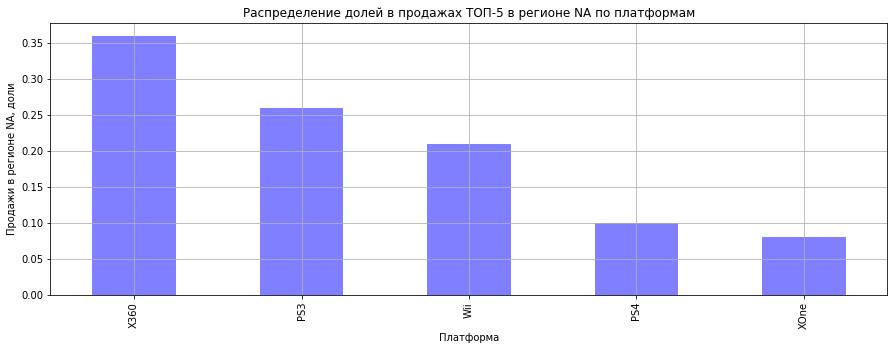

In [83]:
#столбчатый график распределения продаж по платформам
df_platform_top5_na.sort_values(by = 'pie', ascending = False).plot(kind='bar',  color='blue', alpha = 0.5, x ='platform', y='pie', figsize=(15, 5), grid = True, legend=False)
plt.xlabel('Платформа')
plt.ylabel('Продажи в регионе NA, доли')
plt.title('Распределение долей в продажах ТОП-5 в регионе NA по платформам')
plt.show()

In [84]:
#сортировка данных по продажам в EU
df_platform_top5_eu = (df_platform.sort_values(by = 'eu_sales_sum', ascending = False).head())[['platform', 'eu_sales_sum']]
df_platform_top5_eu['pie'] = (df_platform_top5_eu['eu_sales_sum']/(df_platform_top5_eu['eu_sales_sum'].apply(func='sum'))).round(2)
df_platform_top5_eu

,platform,eu_sales_sum,pie
2,PS3,255.00,0.32
7,X360,196.72,0.25
3,PS4,141.09,0.18
5,Wii,124.22,0.16
1,PC,82.32,0.10


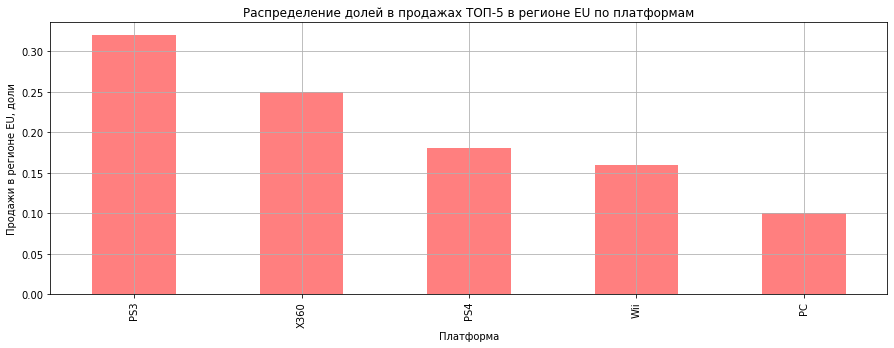

In [85]:
#столбчатый график распределения продаж по платформам
df_platform_top5_eu.sort_values(by = 'pie', ascending = False).plot(kind='bar',  color='red', alpha = 0.5, x ='platform', y='pie', figsize=(15, 5), grid = True, legend=False)
plt.xlabel('Платформа')
plt.ylabel('Продажи в регионе EU, доли')
plt.title('Распределение долей в продажах ТОП-5 в регионе EU по платформам')
plt.show()

In [86]:
#сортировка данных по продажам в JP
df_platform_top5_jp = (df_platform.sort_values(by = 'jp_sales_sum', ascending = False).head())[['platform','jp_sales_sum']]
df_platform_top5_jp['pie'] = (df_platform_top5_jp['jp_sales_sum']/(df_platform_top5_jp['jp_sales_sum'].apply(func='sum'))).round(2)
df_platform_top5_jp

,platform,jp_sales_sum,pie
0,3DS,100.62,0.42
2,PS3,68.29,0.28
5,Wii,34.32,0.14
4,PSV,21.84,0.09
3,PS4,15.96,0.07


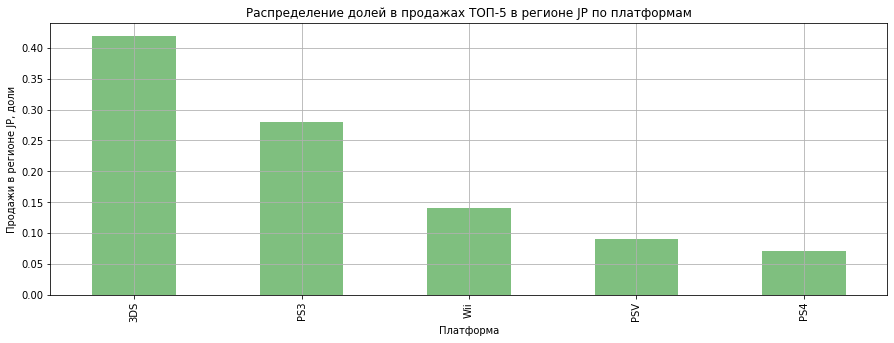

In [87]:
# столбчатый график распределения продаж по платформам
df_platform_top5_jp.sort_values(by = 'pie', ascending = False).plot(kind='bar',  color='green', alpha = 0.5, x ='platform', y='pie', figsize=(15, 5), grid = True, legend=False)
plt.xlabel('Платформа')
plt.ylabel('Продажи в регионе JP, доли')
plt.title('Распределение долей в продажах ТОП-5 в регионе JP по платформам')
plt.show()

In [88]:
#сортировка данных по продажам в Other
df_platform_top5_other = (df_platform.sort_values(by = 'other_sales_sum', ascending = False).head())[['platform','other_sales_sum']]
df_platform_top5_other['pie'] = (df_platform_top5_other['other_sales_sum']/(df_platform_top5_other['other_sales_sum'].apply(func='sum'))).round(2)
df_platform_top5_other

,platform,other_sales_sum,pie
2,PS3,103.48,0.40
7,X360,58.39,0.22
3,PS4,48.35,0.18
5,Wii,35.65,0.14
1,PC,16.06,0.06


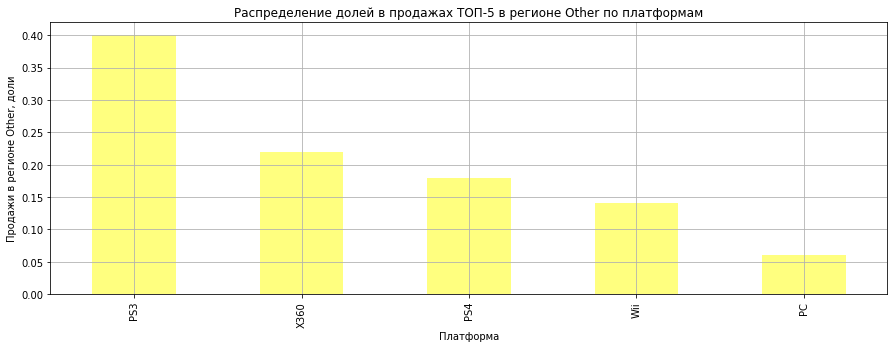

In [89]:
# столбчатый график распределения продаж по платформам
df_platform_top5_other.sort_values(by = 'pie', ascending = False).plot(kind='bar',  color='yellow', alpha = 0.5, x ='platform', y='pie', figsize=(15, 5), grid = True, legend=False)
plt.xlabel('Платформа')
plt.ylabel('Продажи в регионе Other, доли')
plt.title('Распределение долей в продажах ТОП-5 в регионе Other по платформам')
plt.show()

Сводная таблица долей платформ по регионам.

In [90]:
#объединяем таблицы для регионов
df_platform_pie_1 = df_platform_top5_na.merge(df_platform_top5_eu, on='platform', how='outer', suffixes=('_na', '_eu'))

In [91]:
df_platform_pie_2 = df_platform_pie_1.merge(df_platform_top5_jp, on='platform', how='outer')

In [92]:
df_platform_pies = df_platform_pie_2.merge(df_platform_top5_other, on='platform', how='outer', suffixes=('_jp', '_other'))

In [93]:
#Сводная таблица долей платформ по регионам
df_platform_pies

,platform,na_sales_sum,pie_na,eu_sales_sum,pie_eu,jp_sales_sum,pie_jp,other_sales_sum,pie_other
0,X360,408.18,0.36,196.72,0.25,NaN,NaN,58.39,0.22
1,PS3,291.90,0.26,255.00,0.32,68.29,0.28,103.48,0.40
2,Wii,235.75,0.21,124.22,0.16,34.32,0.14,35.65,0.14
3,PS4,108.74,0.10,141.09,0.18,15.96,0.07,48.35,0.18
4,XOne,93.12,0.08,NaN,NaN,NaN,NaN,NaN,NaN
5,PC,NaN,NaN,82.32,0.10,NaN,NaN,16.06,0.06
6,3DS,NaN,NaN,NaN,NaN,100.62,0.42,NaN,NaN
7,PSV,NaN,NaN,NaN,NaN,21.84,0.09,NaN,NaN


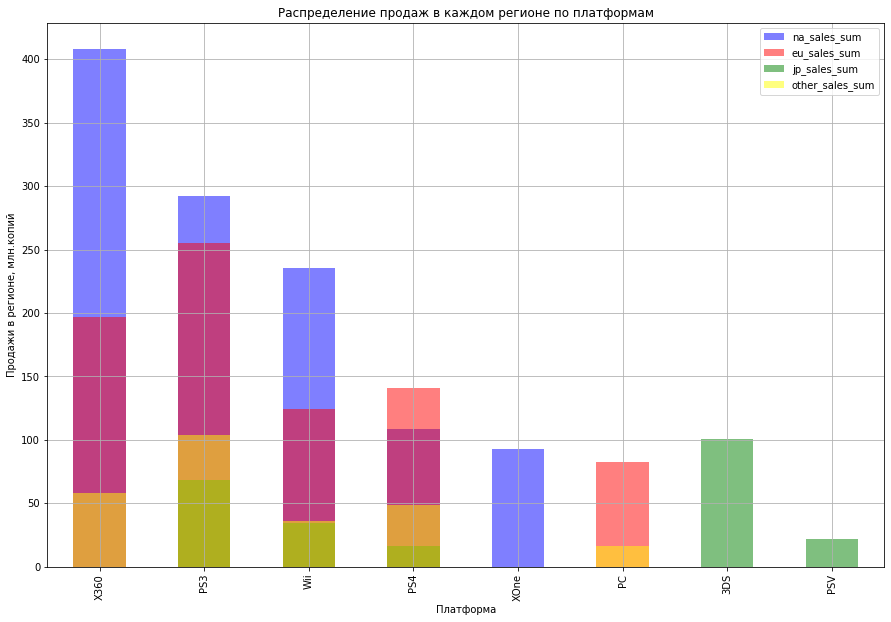

In [94]:
#столбчатый график распределения продаж по платформам в каждом регионе
ax=df_platform_pies.plot(kind='bar',  color='blue', alpha = 0.5, x ='platform', y='na_sales_sum', figsize=(15, 10), grid = True)
df_platform_pies.plot(kind='bar',  color='red', alpha = 0.5, x ='platform', y='eu_sales_sum', figsize=(15, 10), grid = True, ax=ax)
df_platform_pies.plot(kind='bar',  color='green', alpha = 0.5, x ='platform', y='jp_sales_sum', figsize=(15, 10), grid = True, ax=ax)
df_platform_pies.plot(kind='bar',  color='yellow', alpha = 0.5, x ='platform', y='other_sales_sum', figsize=(15, 10), grid = True, ax=ax)

plt.xlabel('Платформа')
plt.ylabel('Продажи в регионе, млн.копий')
plt.title('Распределение продаж в каждом регионе по платформам')
plt.show()

**Вывод**

Различия в долях рынка ТОП-5 игровых платформ в зависимости от региона.

 1. В регионе NA(Северная Америка) доли рынка распределены с следующем порядке (по убыванию): X360, PS3, Wii, PS4, XOne.
  
     
 2. В регионе EU(Евросоюз) доли рынка распределены с следующем порядке (по убыванию): PS3, X360, PS4, Wii, PC.
 
    В EU наблюдается самое равномерное распределение между платформами ТОП-5 в долях рынка. 
    При этом лидер и догоняющий, по сравнению с регионом NA, поменялись местами. Можно говорить о том, что  
    платформа PS рассматривает Евросоюз, как основной рынок и стремится занять там первое место, в то время как 
    платформа X360 /XOne рассматривает его как второй по значению рынок, делая ставку на первое место в регионе 
    NA. Это косвенно подтверждается отсутствием следующего поколения платформы XOne в ТОП-5 EU и большой долей, 
    которую занимает следующее поколение платформы- PS4.
 
 
 3. В регионе JP(Япония) доли рынка распределены с следующем порядке (по убыванию): 3DS, PS3, Wii, PSV, PS4.
    Япония имеет своего регионального лидера, который не представлен больше ни в одном из ТОП-5 рассматриваемых 
    регионов. При  этом он занимает без малого 40% рынка. На втором месте находится платформа PS3 и третье 
    удерживает Wii. Картина в целом напоминает Северную Америка, с той лишь разницей, что место X360 здесь 
    занимает 3DS. В то время как, линейка XOne и X360 вообще не входят в ТОП-5 Японии. 
  
  
 4. В регионе Other(другие страны) доли рынка распределены в следующем порядке (по убыванию): PS3, X360, PS4, Wii, 
    PC. Их соотношения и состав почти копирует ситуацию на рынке EU. 

 
*Обобщение*

-  Во всех изучаемых регионах можно выделить: платформу-лидер (32-40 % рынка); платформу- имеющую второе место   
   (22-28%), платформу занимающую третье место (14-21 %), четвертое место (9-16 %); пятое место (6-10%).


-  Как видно, большую долю в продажах занимают платформы, заканчивающие свой жизненный цикл, что связанно со    
   способом оценки по суммарным продажам за весь период. На догоняющих позициях находятся, следующее поколение тех 
   же самых платформ.
 

-  Тройка лидеров состоит всего из трех платформ: PS3, X360 и 3DS. Причем каждая из них занимает первое место в 
   одном из регионов, а в остальных имеет второе место (кроме 3DS, которая замечена только в Японии).
 
 
-  Стратегия платформы Wii несколько иная - она не пытается занять первое место в каком-либо из рассматриваемых  
   регионов, но при этом старается удерживать 3-е или 4-е, что ей и удается.

<a name="top5_genres"></a>
### ТОП - 5 жанров (различия в долях продаж).

Изучим ТОП-5 жанров регионах: NA, EU, JP, Other.
Популярность будем оценивать на основании количества проданных копий каждом регионе.

In [95]:
#dataframe для анализа
df_actual_platform_2016.sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15359,Touhou Genso Rondo: Bullet Ballet,PS4,2016.0,Shooter,0.02,0.00,0.00,0.00,55.0,4.7,E10+,0.02
3086,Freedom Wars,PSV,2014.0,Role-Playing,0.15,0.10,0.32,0.08,73.0,8.3,T,0.65
12571,Smile PreCure! Let's Go! Marchen World,3DS,2012.0,Action,0.00,0.00,0.06,0.00,NaN,NaN,no_rating,0.06
6616,Monsters vs. Aliens,Wii,2009.0,Action,0.14,0.09,0.00,0.02,69.0,NaN,E10+,0.25
14079,Transport Fever,PC,2016.0,Simulation,0.00,0.03,0.00,0.00,70.0,7.0,no_rating,0.03


In [96]:
#сгруппируем по жанрам
df_genre = df_actual_platform_2016.groupby('genre').agg({'na_sales': ['sum'], 'eu_sales':['sum'], 'jp_sales':['sum'], 'other_sales':['sum']}).reset_index()
df_genre.columns = ['genre','na_sales_sum', 'eu_sales_sum','jp_sales_sum','other_sales_sum']
df_genre

,genre,na_sales_sum,eu_sales_sum,jp_sales_sum,other_sales_sum
0,Action,324.19,251.57,66.70,83.40
1,Adventure,21.48,18.70,8.65,5.69
2,Fighting,52.60,26.12,12.51,10.73
3,Misc,146.26,77.80,19.22,24.39
4,Platform,68.78,45.14,20.01,13.01
5,Puzzle,6.85,4.36,2.90,1.06
6,Racing,55.03,62.32,6.78,17.33
7,Role-Playing,109.14,74.49,75.26,24.08
8,Shooter,272.55,191.04,14.91,64.15
9,Simulation,25.91,33.81,11.97,6.67


In [97]:
#сортировка данных по продажам в NA
df_genre_top5_na = (df_genre.sort_values(by = 'na_sales_sum', ascending = False).head())[['genre','na_sales_sum']]
df_genre_top5_na['pie'] = (df_genre_top5_na['na_sales_sum']/(df_genre_top5_na['na_sales_sum'].apply(func='sum'))).round(2)
df_genre_top5_na

,genre,na_sales_sum,pie
0,Action,324.19,0.30
8,Shooter,272.55,0.26
10,Sports,215.45,0.20
3,Misc,146.26,0.14
7,Role-Playing,109.14,0.10


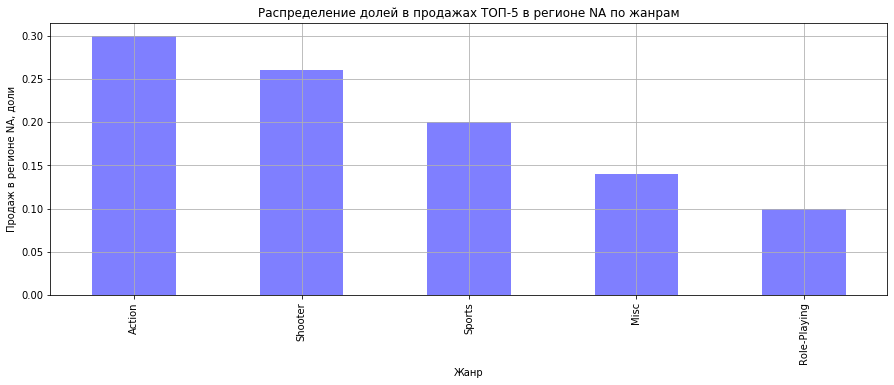

In [98]:
#столбчатый график распределения продаж по жанрам
df_genre_top5_na.sort_values(by = 'pie', ascending = False).plot(kind='bar',  color='blue', alpha = 0.5, x ='genre', y='pie', figsize=(15, 5), grid = True, legend=False)
plt.xlabel('Жанр')
plt.ylabel('Продаж в регионе NA, доли')
plt.title('Распределение долей в продажах ТОП-5 в регионе NA по жанрам')
plt.show()

In [99]:
#сортировка данных по продажам в EU
df_genre_top5_eu = (df_genre.sort_values(by = 'eu_sales_sum', ascending = False).head())[['genre','eu_sales_sum']]
df_genre_top5_eu['pie'] = (df_genre_top5_eu['eu_sales_sum']/(df_genre_top5_eu['eu_sales_sum'].apply(func='sum'))).round(2)
df_genre_top5_eu

,genre,eu_sales_sum,pie
0,Action,251.57,0.34
8,Shooter,191.04,0.26
10,Sports,149.87,0.20
3,Misc,77.80,0.10
7,Role-Playing,74.49,0.10


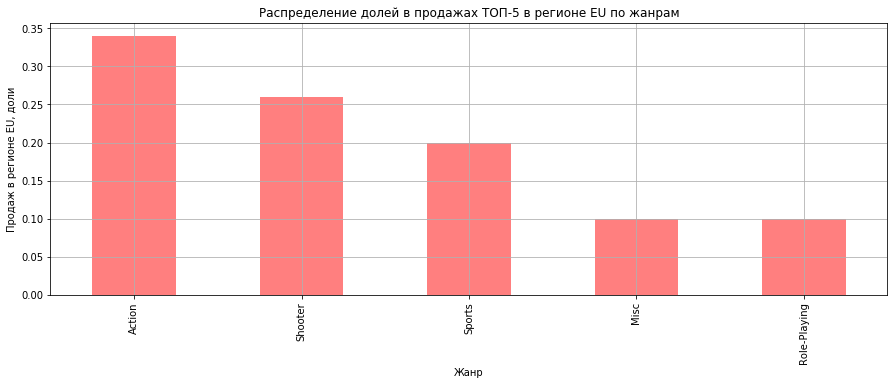

In [100]:
#столбчатый график распределения продаж по жанрам
df_genre_top5_eu.sort_values(by = 'pie', ascending = False).plot(kind='bar',  color='red', alpha = 0.5, x ='genre', y='pie', figsize=(15, 5), grid = True, legend=False)
plt.xlabel('Жанр')
plt.ylabel('Продаж в регионе EU, доли')
plt.title('Распределение долей в продажах ТОП-5 в регионе EU по жанрам')
plt.show()

In [101]:
#сортировка данных по продажам в JP
df_genre_top5_jp = (df_genre.sort_values(by = 'jp_sales_sum', ascending = False).head())[['genre','jp_sales_sum']]
df_genre_top5_jp['pie'] = (df_genre_top5_jp['jp_sales_sum']/(df_genre_top5_jp['jp_sales_sum'].apply(func='sum'))).round(2)
df_genre_top5_jp

,genre,jp_sales_sum,pie
7,Role-Playing,75.26,0.38
0,Action,66.70,0.33
4,Platform,20.01,0.10
3,Misc,19.22,0.10
10,Sports,18.91,0.09


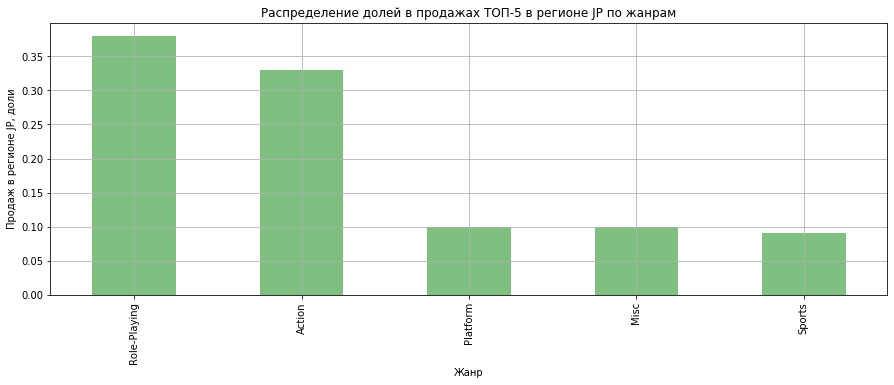

In [102]:
#столбчатый график распределения продаж по жанрам
df_genre_top5_jp.sort_values(by = 'pie', ascending = False).plot(kind='bar',  color='green', alpha = 0.5, x ='genre', y='pie', figsize=(15, 5), grid = True, legend=False)
plt.xlabel('Жанр')
plt.ylabel('Продаж в регионе JP, доли')
plt.title('Распределение долей в продажах ТОП-5 в регионе JP по жанрам')
plt.show()

In [103]:
#сортировка данных по продажам в Other
df_genre_top5_other = (df_genre.sort_values(by = 'other_sales_sum', ascending = False).head())[['genre','other_sales_sum']]
df_genre_top5_other['pie'] = (df_genre_top5_other['other_sales_sum']/(df_genre_top5_other['other_sales_sum'].apply(func='sum'))).round(2)
df_genre_top5_other

,genre,other_sales_sum,pie
0,Action,83.40,0.34
8,Shooter,64.15,0.26
10,Sports,47.74,0.20
3,Misc,24.39,0.10
7,Role-Playing,24.08,0.10


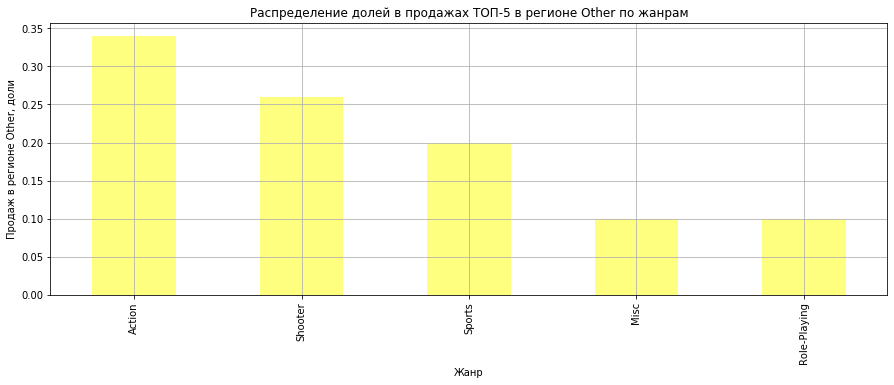

In [104]:
#столбчатый график распределения продаж по жанрам
df_genre_top5_other.sort_values(by = 'pie', ascending = False).plot(kind='bar',  color='yellow', alpha = 0.5, x ='genre', y='pie', figsize=(15, 5), grid = True, legend=False)
plt.xlabel('Жанр')
plt.ylabel('Продаж в регионе Other, доли')
plt.title('Распределение долей в продажах ТОП-5 в регионе Other по жанрам')
plt.show()

In [105]:
#объединяем таблицы для регионов
df_genre_pie_1 = df_genre_top5_na.merge(df_genre_top5_eu, on='genre', how='outer', suffixes=('_na', '_eu'))

In [106]:
df_genre_pie_2 = df_genre_pie_1.merge(df_genre_top5_jp, on='genre', how='outer')

In [107]:
df_genre_pies = df_genre_pie_2.merge(df_genre_top5_other, on='genre', how='outer', suffixes=('_jp', '_other'))

In [108]:
df_genre_pies

,genre,na_sales_sum,pie_na,eu_sales_sum,pie_eu,jp_sales_sum,pie_jp,other_sales_sum,pie_other
0,Action,324.19,0.30,251.57,0.34,66.70,0.33,83.40,0.34
1,Shooter,272.55,0.26,191.04,0.26,NaN,NaN,64.15,0.26
2,Sports,215.45,0.20,149.87,0.20,18.91,0.09,47.74,0.20
3,Misc,146.26,0.14,77.80,0.10,19.22,0.10,24.39,0.10
4,Role-Playing,109.14,0.10,74.49,0.10,75.26,0.38,24.08,0.10
5,Platform,NaN,NaN,NaN,NaN,20.01,0.10,NaN,NaN


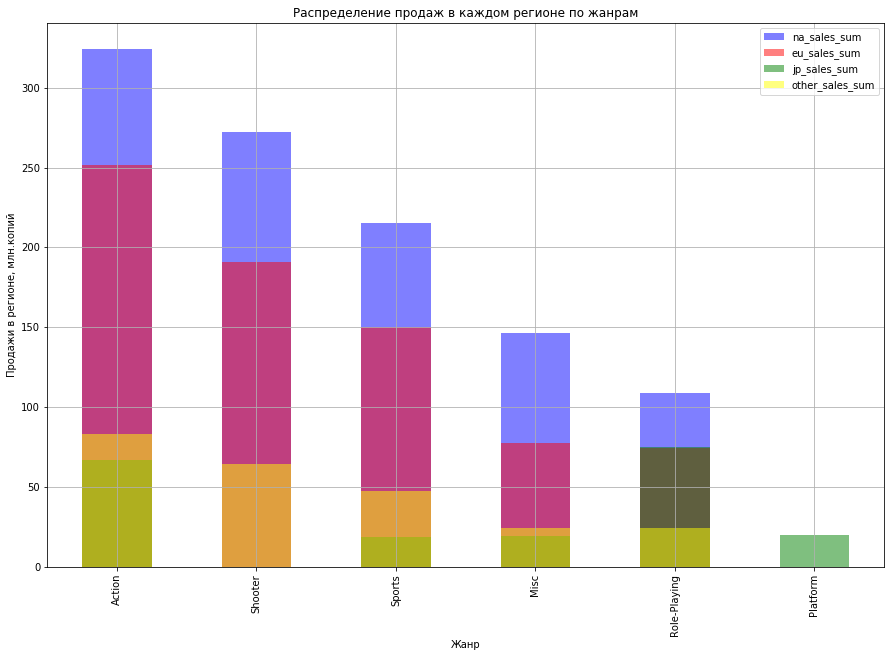

In [109]:
#столбчатый график распределения продаж по жанрам в каждом регионе
ax=df_genre_pies.plot(kind='bar', color='blue', alpha = 0.5, x ='genre', y='na_sales_sum', figsize=(15, 10), grid = True)
df_genre_pies.plot(kind='bar', color='red', alpha = 0.5, x ='genre', y='eu_sales_sum', figsize=(15, 10), grid = True, ax=ax)
df_genre_pies.plot(kind='bar', color='green', alpha = 0.5, x ='genre', y='jp_sales_sum', figsize=(15, 10), grid = True, ax=ax)
df_genre_pies.plot(kind='bar', color='yellow', alpha = 0.5, x ='genre', y='other_sales_sum', figsize=(15, 10), grid = True, ax=ax)

plt.xlabel('Жанр')
plt.ylabel('Продажи в регионе, млн.копий')
plt.title('Распределение продаж в каждом регионе по жанрам')
plt.show()

**Вывод.**

*Различия в долях рынка ТОП-5 игровых жанров в зависимости от региона.*

 1. В трех из четырех исследуемых регионах (NA - Северная Америка, EU -Евросоюз и Other - другие страны) доли рынка по жанрам распределены одинаково. Имеют следующей порядок (по убыванию): Action, Shooter, Sports, Misc, Role-Playing.
 
 2. Но один регион выбивается из этой тенденции и показывают сильно отличающиеся результаты - это Япония. Доли рынка по жанрам распределены здесь по другому (в порядке убывания): Role-Playing, Action, Misc, Platform, Sports. 

  
*Разница.*
  
- Серьезное отличие в жанре - лидере - в Японии это Role-Playing (38%), в то время как во всех других регионах 
  этот жанр плетется в хвосте, имея стабильные 10%. Другие регионы отдают предпочтение жанру Action (30-34%).
 
- Еще одним серьезным отличием является наличие в японском ТОП жанра Platform, которого нет ни в одном из ТОП-5  
  других регионов.

- При этом второй по популярности в Европе и Америке жанр - Shooter, в Японии вообще не вошел в ТОП-5. 
 

*Тенденции, которые в Японии похожи на результаты наблюдений в Европе, Америке и в других регионах.*

- Жанр Action здесь также в лидерах (33%) и занимает почетное второе место (для сравнения в EU, NA и Other его 
  доля от 30 до 34 %).
  
- Жанр Misc стабильно имеет долю рынка в 10%, что очень похоже на регионы EU, Other, и немного отличается от   
  NA(14%).  
  
  
*Причины отличия рынка Японии от других рассматриваемых регионов.*
 
 
- Скорее всего серьезные отличия на японском рынке связаны с менталитетом этой страны, который сильно отличается от европейского (и соответственно северо-американского). 
 
 
- Япония - островная культура, которая в течении долгих периодов истории развивалась почти в изоляции от остального мира. Это не могло не наложить отпечаток на восприятие мира и взаимодействие с ним. К этому можно добавить систему письменности на основе иероглифов, которая также довольно сильно отличается от алфавитной и является системой самодостаточных символов.
 
 
- Все это в комплексе влияет на систему функционирования общества и установление социальных связей, которые создают систему внутренних и внешних табу. Игры позволяют их нарушать "понарошку". 

<a name="ESRB"></a>
### Влияние рейтинга ESRB на продажи в отдельном регионе.
   
Изучим влияние рейтинга ESRB на продажи в регионах: NA, EU, JP, Other.

In [110]:
#dataframe для анализа
df_actual_platform_2016.sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
3920,Dragon Ball: Raging Blast,X360,2009.0,Fighting,0.36,0.08,0.02,0.04,56.0,7.5,T,0.50
2748,Band Hero,PS3,2009.0,Misc,0.41,0.23,0.00,0.11,76.0,5.7,E10+,0.75
1551,Kid Icarus: Uprising,3DS,2012.0,Action,0.48,0.35,0.36,0.07,83.0,8.7,E10+,1.26
5306,Terminator Salvation,X360,2009.0,Shooter,0.13,0.18,0.00,0.04,48.0,5.0,T,0.35
4091,MotorStorm: Apocalypse,PS3,2011.0,Racing,0.21,0.19,0.00,0.08,77.0,7.7,T,0.48


In [111]:
#список возможных значений рейтинга
df_actual_platform_2016['rating'].value_counts()

no_rating    1630
T             980
E             928
M             818
E10+          630
EC              4
RP              1
Name: rating, dtype: int64

In [112]:
#отфильтруем данные по нужным параметрам: sales и rating
df_esrb = df_actual_platform_2016[['name','na_sales','eu_sales','jp_sales','other_sales','rating', 'total_sales']]
df_esrb

,name,na_sales,eu_sales,jp_sales,other_sales,rating,total_sales
3,Wii Sports Resort,15.61,10.93,3.28,2.95,E,32.77
8,New Super Mario Bros. Wii,14.44,6.94,4.70,2.24,E,28.32
14,Kinect Adventures!,15.00,4.89,0.24,1.69,E,21.82
15,Wii Fit Plus,9.01,8.49,2.53,1.77,E,21.80
16,Grand Theft Auto V,7.02,9.09,0.98,3.96,M,21.05
...,...,...,...,...,...,...,...
16705,15 Days,0.00,0.01,0.00,0.00,no_rating,0.01
16707,Aiyoku no Eustia,0.00,0.00,0.01,0.00,no_rating,0.01
16710,Samurai Warriors: Sanada Maru,0.00,0.00,0.01,0.00,no_rating,0.01
16712,Haitaka no Psychedelica,0.00,0.00,0.01,0.00,no_rating,0.01


In [113]:
#сгруппируем по рейтингу и посчитаем суммарные продажи по каждому значения рейтинга во всех регионах
df_esrb_group = df_esrb.groupby('rating').agg({'na_sales': ['sum'], 'eu_sales':['sum'], 'jp_sales':['sum'], 'other_sales':['sum'], 'total_sales':['sum']}).reset_index()
df_esrb_group.columns = ['rating','na_sales_sum', 'eu_sales_sum','jp_sales_sum','other_sales_sum','total_sales']

#сортируем по глобавльным продажам (по убыванию)
df_esrb_group = df_esrb_group.sort_values(by = 'total_sales', ascending = False)
df_esrb_group

,rating,na_sales_sum,eu_sales_sum,jp_sales_sum,other_sales_sum,total_sales
3,M,437.47,323.49,34.20,108.56,903.72
0,E,334.02,232.43,54.34,69.63,690.42
6,no_rating,151.96,141.90,119.53,40.73,454.12
5,T,213.24,147.11,42.18,49.71,452.24
1,E10+,174.00,105.45,11.54,33.17,324.16
2,EC,0.71,0.00,0.00,0.04,0.75
4,RP,0.00,0.03,0.00,0.01,0.04


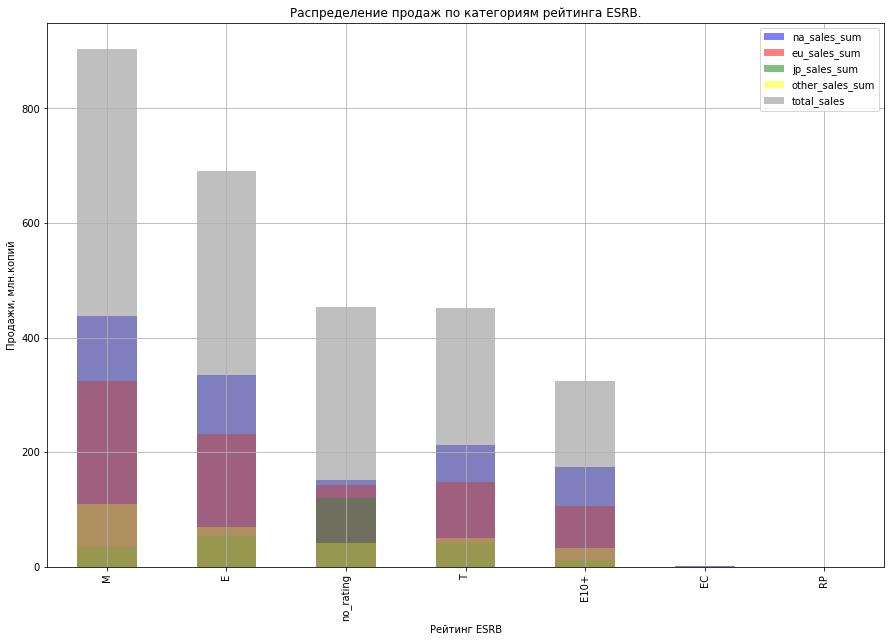

In [114]:
#столбчатый график распределения прибыли по категориям рейтинга ESRB
ax=df_esrb_group.plot(kind='bar', color='blue', alpha = 0.5, x ='rating', y='na_sales_sum', figsize=(15, 10), grid = True)
df_esrb_group.plot(kind='bar', color='red', alpha = 0.5, x ='rating', y='eu_sales_sum', figsize=(15, 10), grid = True, ax=ax)
df_esrb_group.plot(kind='bar', color='green', alpha = 0.5, x ='rating', y='jp_sales_sum', figsize=(15, 10), grid = True, ax=ax)
df_esrb_group.plot(kind='bar', color='yellow', alpha = 0.5, x ='rating', y='other_sales_sum', figsize=(15, 10), grid = True, ax=ax)
df_esrb_group.plot(kind='bar', color='grey', alpha = 0.5, x ='rating', y='total_sales', figsize=(15, 10), grid = True, ax=ax)

plt.xlabel('Рейтинг ESRB')
plt.ylabel('Продажи, млн.копий')
plt.title('Распределение продаж по категориям рейтинга ESRB.')
plt.show()

**Вывод**

Как видно на столбчатом графике распределения продаж по рейтингам ESRB, он влияет на продажи во всех регионах одинаковым образом.
- категория М («Mature», от 17 лет) имеет максимальные продажи;
- категория E («Everyone», для всех) занимает второе место;
- категория T («Teen», подросткам 13—19 лет) занимает третье место;
- категория E10+ («Everyone 10 and older», для всех старше 10 лет) - 4 место;
- в категориях EC(«Early childhood», для детей младшего возраста - развивающие игры для малышей) и RP(«Рейтинг ожидается») продажи почти отсутствуют.


Данная зависимость скорее всего связана с количеством пользователей в различных возрастных группах. При этом пользователи категория E могут иметь любой возраст.

*Игры "без категории"*
 
 
1. Игры без категории 'no_rating' есть во всех регионах и имеют аналогичные доли распределения по ним. Они  
   занимают 4 место по глобальному количеству проданных копий. Скорее всего, большая часть из них относится к 
   категории E.
   
    
2. В то же время, количество проданных игры с категорией 'no_rating' (игры, для которых не указана категория) 
   сильно отличается по регионам. Например, в Японии их больше, чем игр каждой отдельно взятой категории, а в США 
   их доля намного меньше и они занимают 5-ую по размерам долю. В Европе их количество сопоставимо с играми 
   категории T. Такая тенденцию, как мне кажется отражает уровень влияния ESRB в каждом регионе. Поскольку 
   организация возникла в Северной Америке, то она исторически имеет там более сильное влияние, чем в других 
   регионах. 


3. Интересные показатели в Японии объясняются наличием местной организации Computer Entertainment Rating 
   Organization (CERO), принципиальным отличием которой является наличие категории Z (продукт пригоден для людей 
   от 18 лет и выше). Продажа игр категории Z в Японии контролируется государством. Данный аспект, важно учитывать 
   при планировании рекламной компании в данном регионе.

**Вывод по разделу "Портрет пользователя каждого региона"**


- Возрастная группа во всех регионах приблизительно одинаковая: большую часть составляют игроки от 17 лет, затем 
  идут тинейджеры (от 13 до 17 лет), меньше всего игроков от 10 до 13 лет.
 
 
- Характерный портрет пользователя из Северной Америки(NA) следующий: он пользуется игровыми платформами X360, PS3 
  и Wii, из жанров игр предпочитает Action, Shooter и Sport. 
 
 
- Пользователь из Европы (EU) и других стран(Other) в основном использует игровые платформы PS3, X360, PS4, Wii. 
  Предпочитает такие же, как в NA жанры игр: Action, Shooter и Sport.

 
*Портрет японского пользователя игр отличается от европейцев и американцев:* 
 1. он чаще всего использует игровую платформу 3DS, не очень популярную за пределами Японии;
 2. предпочитает игры жанры Role-Playing(при чем их доля (38%) превосходит даже показатели жанров-лидеров в Америке, Европе и других регионах);
 3. не любит жанр Shooter, который очень нравится пользователям в Европе и Америке;
 4. любит жанр Platform, который  не популярен за пределами Японии.

*Однако есть несколько моментов, в которых японский пользователь совпадают в предпочтениях с EU, NA и Other:*
 1. Платформы PS3 и Wii - также очень популярны.
 2. Жанр Action - один из самых популярных.
 3. Жанр Misc имеет аналогичные показатели популярности в 10%.

<a name="hypothesis"></a>
## Проверка гипотез.

<a name="hypothesis_1"></a>
### Гипотеза: средние пользовательские рейтинги платформ XBOX One и PC одинаковые.

H0 - нулевая гипотеза: средние пользовательские рейтинги платформ XBOX One и PC равны. Формируем ее исходя из того, что она должна иметь знак равенства в формулировке.
 
H1 - альтернативная гипотеза: средние пользовательские рейтинги платформ XBOX One и PC отличаются. Она должна быть противоположной по смыслу нулевой гипотезе.
  
Для проверки гипотез используем критерий порогового уровня статистической значимости равный 5%, как один из общепринятых критериев оценки достоверности гипотез.

In [115]:
#фильтрация по платформе XOne
df_actual_xone = df_actual_platform_2016[df_actual_platform_2016['platform'] =='XOne']
df_actual_xone.sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
165,Grand Theft Auto V,XOne,2014.0,Action,2.81,2.19,0.0,0.47,97.0,7.9,M,5.47
10620,Resident Evil: Revelations 2,XOne,2015.0,Action,0.07,0.02,0.0,0.01,75.0,7.5,M,0.10
12400,TrackMania Turbo,XOne,2016.0,Action,0.02,0.04,0.0,0.00,76.0,7.7,E,0.06
493,Call of Duty: Ghosts,XOne,2013.0,Shooter,1.88,0.77,0.0,0.27,78.0,4.3,M,2.92
3579,Minecraft: Story Mode,XOne,2015.0,Adventure,0.30,0.21,0.0,0.05,NaN,NaN,no_rating,0.56


In [116]:
#удалим строки, у которых в столбце user_score есть пропуски
df_actual_xone.dropna(subset = ['user_score'], inplace = True) 

#проверка
df_actual_xone.isna().sum()

name                0
platform            0
year_of_release     0
genre               0
na_sales            0
eu_sales            0
jp_sales            0
other_sales         0
critic_score       17
user_score          0
rating              0
total_sales         0
dtype: int64

In [117]:
#Дисперсия польз. оценок для платформы XOne
print('Дисперсия пользовательских оценок для платформы XOne:', np.var(df_actual_xone['user_score']))

Дисперсия пользовательских оценок для платформы XOne: 1.8965188383045526


In [118]:
#фильтрация по платформе PC
df_actual_pc = df_actual_platform_2016[df_actual_platform_2016['platform'] =='PC']
df_actual_pc.sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
3041,The Sims 3: High-End Loft Stuff,PC,2010.0,Simulation,0.01,0.54,0.0,0.11,NaN,6.5,T,0.66
12834,Rocket League,PC,2016.0,Sports,0.01,0.04,0.0,0.00,86.0,8.2,E,0.05
12955,IL-2 Sturmovik: Cliffs of Dover,PC,2011.0,Simulation,0.00,0.04,0.0,0.01,60.0,7.1,T,0.05
4809,FIFA 14,PC,2013.0,Sports,0.01,0.36,0.0,0.03,87.0,4.6,E,0.40
12856,Ski Region Simulator,PC,2011.0,Simulation,0.00,0.05,0.0,0.01,NaN,NaN,no_rating,0.06


In [119]:
#удалим строки, у которых в столбце user_score есть пропуски
df_actual_pc.dropna(subset = ['user_score'], inplace = True) 

#проверка
df_actual_pc.isna().sum()

name                0
platform            0
year_of_release     0
genre               0
na_sales            0
eu_sales            0
jp_sales            0
other_sales         0
critic_score       33
user_score          0
rating              0
total_sales         0
dtype: int64

In [120]:
#Дисперсия польз. оценок для платформы PC
print('Дисперсия пользовательских оценок для платформы PC:', np.var(df_actual_pc['user_score']))

Дисперсия пользовательских оценок для платформы PC: 2.4049464445604243


In [121]:
#Задаем уровень значимости:
alpha_1 = 0.05

#Используем метод для проверки равенства средних двух генеральных совокупностей
#Дисперсии отличаются, поэтому устанавливаем параметр equal_var = False
results_1 = st.ttest_ind(df_actual_xone['user_score'], df_actual_pc['user_score'], equal_var = False)

print('p-значение:', results_1.pvalue)

#Сравниваем pvalue с альфа
if (results_1.pvalue < alpha_1):
    print("Отвергаем нулевую гипотезу. Вывод: средние пользовательские рейтинги платформ XBOX One и PC отличаются.")
else:
    print("Не получилось отвергнуть нулевую гипотезу. Вывод: средние пользовательские рейтинги платформ XBOX One и PC равны.")

p-значение: 0.29856178733970584
Не получилось отвергнуть нулевую гипотезу. Вывод: средние пользовательские рейтинги платформ XBOX One и PC равны.


**Вывод**

По результатам статистической проверки нулевой гипотезы  отвергнуть ее не получилось, т.к. значение статистической значимости больше заданного(5%). Таким образом, рассматриваем нулевую гипотезу - средние пользовательские рейтинги платформ XBOX One и PC равны.

<a name="hypothesis_2"></a>
### Гипотеза: средние пользовательские рейтинги жанров Action и Sports разные.

H0 - нулевая гипотеза: средние пользовательские рейтинги жанров Action и Sports равны. Формируем ее исходя из того, что она должна иметь знак равенства в формулировке.
 
H1 - альтернативная гипотеза: средние пользовательские рейтинги жанров Action и Sports отличаются. Она должна быть противоположной по смыслу нулевой гипотезе.
  
Для проверки гипотез используем критерий порогового уровня статистической значимости равный 5%, как один из общепринятых критериев оценки достоверности гипотез.

In [122]:
#фильтрация по жанру Action
df_actual_action = df_actual_platform_2016[df_actual_platform_2016['genre'] =='Action']
df_actual_action.sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
4881,Harry Potter and the Deathly Hallows - Part 1,PS3,2010.0,Action,0.13,0.20,0.00,0.07,38.0,2.8,T,0.40
3003,Book of Spells,PS3,2012.0,Action,0.14,0.39,0.00,0.15,NaN,NaN,no_rating,0.68
7403,Pro Evolution Soccer 2012,Wii,2011.0,Action,0.08,0.08,0.03,0.02,79.0,7.0,E,0.21
8018,Saw II: Flesh & Blood,PS3,2010.0,Action,0.10,0.06,0.00,0.02,NaN,NaN,no_rating,0.18
4197,Rise of Nightmares,X360,2011.0,Action,0.28,0.13,0.01,0.04,54.0,7.8,M,0.46


In [123]:
#удалим строки, у которых в столбце user_score есть пропуски
df_actual_action.dropna(subset = ['user_score'], inplace = True)  

#проверка
df_actual_action.isna().sum()

name                 0
platform             0
year_of_release      0
genre                0
na_sales             0
eu_sales             0
jp_sales             0
other_sales          0
critic_score       102
user_score           0
rating               0
total_sales          0
dtype: int64

In [124]:
#Дисперсия для жанра Action
print('Дисперсия для жанра Action:', np.var(df_actual_action['user_score']))

Дисперсия для жанра Action: 1.80012422212878


In [125]:
#фильтрация по жанру Sports
df_actual_sports = df_actual_platform_2016[df_actual_platform_2016['genre'] =='Sports']
df_actual_sports.sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16120,NBA 2K17,PC,2016.0,Sports,0.00,0.01,0.00,0.00,90.0,6.3,E,0.01
8392,Backyard NFL Football '10,Wii,2009.0,Sports,0.16,0.00,0.00,0.01,NaN,NaN,no_rating,0.17
1775,WWE 2K15,PS4,2014.0,Sports,0.39,0.57,0.00,0.19,62.0,5.1,T,1.15
2918,NHL 12,X360,2011.0,Sports,0.55,0.10,0.00,0.05,86.0,7.0,E10+,0.70
4875,Fishing Resort,Wii,2011.0,Sports,0.14,0.00,0.25,0.01,69.0,7.0,E,0.40


In [126]:
#удалим строки, у которых в столбце user_score есть пропуски
df_actual_sports.dropna(subset = ['user_score'], inplace = True)  

#проверка
df_actual_sports.isna().sum()

name                0
platform            0
year_of_release     0
genre               0
na_sales            0
eu_sales            0
jp_sales            0
other_sales         0
critic_score       74
user_score          0
rating              0
total_sales         0
dtype: int64

In [127]:
#Дисперсия для жанра Sports
print('Дисперсия для жанра Sports:', np.var(df_actual_sports['user_score']))

Дисперсия для жанра Sports: 2.9107184448624928


In [128]:
#Задаем уровень значимости:
alpha_2 = 0.05

#Используем метод для проверки равенства средних двух генеральных совокупностей
#Дисперсии отличаются, поэтому устанавливаем equal_var = False
results_2 = st.ttest_ind(df_actual_action['user_score'], df_actual_sports['user_score'], equal_var = False)

print('p-значение:', results_2.pvalue)

#Сравниваем pvalue с альфа
if (results_2.pvalue < alpha_2):
    print("Отвергаем нулевую гипотезу. Вывод: средние пользовательские оценки жанров Action и Sports отличаются.")
else:
    print("Не получилось отвергнуть нулевую гипотезу. Вывод: средние пользовательские оценки жанров Action и Sports равны.")

p-значение: 4.7767270891595776e-14
Отвергаем нулевую гипотезу. Вывод: средние пользовательские оценки жанров Action и Sports отличаются.


**Вывод**

 
По результатам статистической проверки отвергаем нулевую гипотезу, т.к. значение статистической значимости намного меньше заданного(5%). Таким образом, рассматриваем  гипотезу -средние пользовательские рейтинги жанров Action и Sports отличаются.

<a name="conclusion"></a>
## Общий вывод.

*В исследовании были выявлены важные закономерности, влияющие на успешность игр.*

1. Цикл жизни платформы. Он составляет в среднем 10 лет и состоит из роста продаж, достижения пика и последующего снижения. На этапе снижения происходит ввод нового поколения платформ, которые в это время проходят этап роста. Исходя из этой информации, можно выбирать платформы, которые будут активны в интересующий период времени. В нашем исследовании мы определили актуальный период, в который мы проводим изучение влияния различных параметров на продажи игр: с 2009 по 2016 год. 
  
  
2. Исходя из цикла жизни и динамики суммарных продаж, мы отобрали три потенциально прибыльных платформы: PS4, 3DS, XOne. Они находятся на пике своего развития и в ближайщий год можно ожидать высокий уровень продаж.
 
  
3. Изучая распределение объемов продаж по играм, мы выявили, что у всех платформ (особенно выраженно у 3DS) имеется длинный правый "ус" и "вбросы", которые на самом деле являются лидерами по объемам продаж. При планировании рекламной компании этим играм важно уделить максимальное внимание, т.к. их продажи на порядок превышают средние значения.
  
  
4. Мы изучили влияние оценки критиков на продажи игр и выявили слабую положительную зависимость. Т.е. их стоит иметь ввиду при планировании рекламной компании, но они не являются определяющими. 
  
  
5. В результате изучения влияния оценки пользователей мы пришли к выводу, что они не влияют на продажи игр.
  
  
6. Составили рейтинг жанров игр по оценке глобальных продаж. Его лидерами стали: Action, Shooter, Role-playing, Sports.
  
  
7. Составили "портреты" пользователей в различных регионах:
  - Возрастная группа во всех регионах приблизительно одинаковая: большую часть составляют игроки от 17 лет, затем идут тинейджеры (от 13 до 17 лет), меньше всего игроков от 10 до 13 лет.
  - NA: используются игровые платформы X360, PS3 и Wii; из жанров игр предпочитают: Action, Shooter и Sport. 
  - EU и других стран(Other): используют преимущественно игровые платформы PS3, X360, PS4, Wii. Популярные жанры: Action, Shooter и Sport.
  - JP: используют игровые платформы 3DS, PS3, Wii. Популярные жанры: Role-Playing, Action, Misc, Platform. 
  
    
8. По результатам статистической проверки гипотезы о равенстве пользовательских рейтингов у платформ XOne и PC пришли к выводу, что имеющиеся данные не противоречат этому предположению. 
  
  
9. Гипотезу о различии средних пользовательских оценок жанров Action и Sports в результате статистической проверки опровергнуть не удалось.


*Рекомендации по планированию маркетинговых мероприятий на 2017 год:*

1. Основное внимание уделить потенциально прибыльным платформам: PS4, 3DS, XOne.
  
  
2. Сделать акцент на играх-лидерах продаж по каждой платформе.
 
 
3. Уделить внимание тонкостям рекламной компании в Японии. Акцент на платформе 3DS и жанре Role-Playing.

 
4. Наиболее интересна целевая аудитория с возрастом: +17.